<a href="https://colab.research.google.com/github/paridhika/DDL/blob/main/Cost_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# 𝛌 = 2𝛍(𝛍w-1)/(2𝛍w-1)
# w_Q = 𝜌/2𝛍(1-𝜌)
# Task Model - [ DNN Model] [ Compute (GFLOP/Image), Memory (MB), Input Image Size (Mbit), Output Size (Mbit)]
ResNet50 = [ 3.86891556, 102, 1.204224, 0.032 ]
InseptionResNetV2 = [ 20.099918248, 230, 2.145624, 0.032 ]

ResNet50 = [ 1, 102, 1, 0.032 ] # Ratio - complexity:input
alpha = 1;
Batch_Size = []
Model_Size = []
Ratio_out = []
Ratio_model = []

# Jetson
# # Solution switch from Edge to NE for best latency => E_L to NE_L
# value = 2
# out = 0
# model = 0
# while value >= 0.2:
#     Batch_Size.append(value)
#     Model_Size.append(1)
#     value -= 0.05
#     Ratio_out.append(1/value)
#     out += 1
# ind_lat_ENE = out

# # Solution switch from Edge to Cloud for best latency => E_L to C_L
# value = 53.45

# while value < 53.55:
#     Batch_Size.append(1)
#     Model_Size.append(value)
#     value += 0.005
#     Ratio_model.append(value)
#     model+=1
# ind_lat_EC = model

# # Solution switch from Edge to NE for best cost => E_C to NE_C
# value = 4

# while value >= 0.2:
#     Batch_Size.append(value)
#     Model_Size.append(1)
#     value -= 0.05
#     Ratio_out.append(1/value)
#     out += 1
# ind_cost_ENE = out

# # Solution switch from Edge to Cloud for best latency => E_C to C_C
# value = 60

# while value < 80:
#     Batch_Size.append(1)
#     Model_Size.append(value)
#     value += 5
#     Ratio_model.append(value)
#     model+=1
# ind_cost_EC = model


# value = 0.5

# while value < 80:
#     Batch_Size.append(1)
#     Model_Size.append(value)
#     value += 5
#     Ratio_model.append(value)
#     model+=1
# ind_cost_EC = model
# Infrastructure Model - [Edge, Near the Edge, Cloud ]
# Edge Devices - [E1 , E2 .  .  .  .  . Ek ]
# Near the Edge - [NE1 , NE2 .  .  .  .  . NEl ]
# Cloud - [C1 , C2 .  .  .  .  . Cm ]
# Ee - [Compute (GFLOPs), Memory (GB), Max B/w (Mbps), Cost (USD/sec)]
# CPU/GPU/TPU - [Compute (GFLOPs), Memory (GB), Max B/w (Mbps), Cost (USD/sec)]

# PC
# Solution switch from Edge to NE for best latency => E_L to NE_L
value = 10
out = 0
model = 0
while value >= 0.5:
    Batch_Size.append(value)
    Model_Size.append(1)
    value -= 0.1
    Ratio_out.append(1/value)
    out += 1
ind_lat_ENE = out

# Solution switch from Edge to Cloud for best latency => E_L to C_L
value = 0.1

while value <= 2.5:
    Batch_Size.append(1)
    Model_Size.append(value)
    value += 0.1
    Ratio_model.append(value)
    model+=1
ind_lat_EC = model

# Solution switch from Edge to NE for best cost => E_C to NE_C
value = 0.5

while value >= 0.01:
    Batch_Size.append(value)
    Model_Size.append(1)
    value -= 0.1
    Ratio_out.append(1/value)
    out += 1
ind_cost_ENE = out

# Solution switch from Edge to Cloud for best cost => E_C to C_C
value = 0.1

while value <= 5:
    Batch_Size.append(1)
    Model_Size.append(value)
    value += 0.1
    Ratio_model.append(value)
    model+=1
ind_cost_EC = model

Rpi = [24, 8, 1000, 1.840542 * 10 ** -6]
PC = [900, 128, 10000, 1.155 * 10 ** -5]
Jetson = [512, 4, 1000, 1.88266 * 10 ** -5]
CPU = [3500, 60, 10000, 0.000442]
GPU = [312000, 320, 400000, 0.0011378 ]
TPU = [191667, 192, 50000, 0.0003]

Utilization_Edge = 0.4
Utilization_NE = 0.75





# Network Configuration Mbps
PCtoNE = 8000 # Mbps
PCtoC = 1000
RpitoNE = 1000
RpitoC = 300
JetsontoNE = 1000
JetsontoC = 300
PDEtoNE = 0.001 #sec
# PDEtoC = 0.101
PDEtoC = 0.001

TrCostpersec = 5.787 * 10 ** -5 # Transmission cost over internet

PTimeperImage = [ResNet50[0]/Rpi[0], ResNet50[0]/PC[0], ResNet50[0]/CPU[0], ResNet50[0]/GPU[0], ResNet50[0]/TPU[0], ResNet50[0]/Jetson[0]]
PCostperImage = [PTimeperImage[0]*(Rpi[3]/Utilization_Edge), PTimeperImage[1]*(PC[3]/Utilization_Edge), PTimeperImage[2]*CPU[3], PTimeperImage[3]*GPU[3], PTimeperImage[4]*TPU[3], PTimeperImage[5]*(Jetson[3]/Utilization_Edge)]

Mu = [1/x for x in PTimeperImage]
arrival = [Utilization_Edge*Mu[0], Utilization_Edge*Mu[1], Utilization_NE*Mu[2], Utilization_NE*Mu[3], Utilization_NE*Mu[4], Utilization_Edge*Mu[5]]
ResponseTime = [1/(y-x) for x, y in zip(arrival, Mu)]
# ResponseTime.append(1/Mu[2])
# ResponseTime.append(1/Mu[3])
# ResponseTime.append(1/Mu[4])
waitTime = [(x-(1/y))/2 for x, y in zip(ResponseTime, Mu)]
# ResponseTime = np.arange(CTimeperImage[0], 0.5, 0.05) # latency range for Rpi and PC
# ResponseTime = np.arange(0.0023, 0.003, 0.0001) # latency range for Near Edge
# ResponseTime = np.arange(0.11, 0.3, 0.01) # latency range for Near Edge


TrTimeperImage = [ResNet50[2]/RpitoNE , ResNet50[2]/PCtoNE , ResNet50[2]/RpitoC, ResNet50[2]/PCtoC, ResNet50[2]/JetsontoNE, ResNet50[2]/JetsontoC]
TrCostperImage = []
for item in TrTimeperImage:
    TrCostperImage.append(item * TrCostpersec)

TCostOutput =  [ResNet50[3]/RpitoNE + PDEtoNE, ResNet50[3]/RpitoC + PDEtoC, ResNet50[3]/PCtoNE + PDEtoNE, ResNet50[3]/PCtoC + PDEtoC, ResNet50[3]/JetsontoNE + PDEtoNE, ResNet50[3]/JetsontoC + PDEtoC]

PTimeRpi = []
PCostRpi = []
PTimePC = []
PCostPC = []
PTimeJetson = []
PCostJetson = []

for size in Model_Size:
  PTimeRpi.append(size*PTimeperImage[0] + waitTime[0])
  PCostRpi.append(size*PCostperImage[0])
  PTimePC.append(size*PTimeperImage[1] + waitTime[1])
  PCostPC.append(size*PCostperImage[1])
  PTimeJetson.append(size*PTimeperImage[5] + waitTime[5])
  PCostJetson.append(size*PCostperImage[5])

TrTimeRpitoNE = []
TrCostRpitoNE = []

TrTimePCtoNE = []
TrCostPCtoNE = []

TrTimeJetsontoNE = []
TrCostJetsontoNE = []

for size in Batch_Size:
  TrTimeRpitoNE.append(size*TrTimeperImage[0])
  TrCostRpitoNE.append(size*TrCostperImage[0])
  TrTimePCtoNE.append(size*TrTimeperImage[1])
  TrCostPCtoNE.append(size*TrCostperImage[1])
  TrTimeJetsontoNE.append(size*TrTimeperImage[4])
  TrCostJetsontoNE.append(size*TrCostperImage[4])

TrTimeRpitoC = []
TrCostRpitoC = []

TrTimePCtoC = []
TrCostPCtoC = []
TrTimeJetsontoC = []
TrCostJetsontoC = []

for size in Batch_Size:
  TrTimeRpitoC.append(size*TrTimeperImage[2])
  TrCostRpitoC.append(size*TrCostperImage[2])
  TrTimePCtoC.append(size*TrTimeperImage[3])
  TrCostPCtoC.append(size*TrCostperImage[3])
  TrTimeJetsontoC.append(size*TrTimeperImage[5])
  TrCostJetsontoC.append(size*TrCostperImage[5])

PTimeCPU = []
PTimeGPU = []
PTimeTPU = []

for size in Model_Size:
  PTimeCPU.append(size*PTimeperImage[2])
  PTimeGPU.append(size*PTimeperImage[3])
  PTimeTPU.append(size*PTimeperImage[4])

PCostCPUNE = []
PCostGPUNE = []
PCostTPUNE = []
PCostCPUC = []
PCostGPUC = []
PCostTPUC = []

for size in Model_Size:
  PCostCPUNE.append(size*PCostperImage[2]/Utilization_NE)
  PCostGPUNE.append(size*PCostperImage[3]/Utilization_NE)
  PCostTPUNE.append(size*PCostperImage[4]/Utilization_NE)
  PCostCPUC.append(size*PCostperImage[2])
  PCostGPUC.append(size*PCostperImage[3])
  PCostTPUC.append(size*PCostperImage[4])

# Rpi

TTimeRpiCPUNE = np.array(TrTimeRpitoNE) + np.array(PTimeCPU) + PDEtoNE + waitTime[2]
TTimeRpiGPUNE = np.array(TrTimeRpitoNE) + np.array(PTimeGPU) + PDEtoNE + waitTime[3]
TTimeRpiTPUNE = np.array(TrTimeRpitoNE) + np.array(PTimeTPU) + PDEtoNE + waitTime[4]

TCostRpiCPUNE = np.array(TrCostRpitoNE) + np.array(PCostCPUNE) + PDEtoNE * TrCostpersec
TCostRpiGPUNE = np.array(TrCostRpitoNE) + np.array(PCostGPUNE) + PDEtoNE * TrCostpersec
TCostRpiTPUNE = np.array(TrCostRpitoNE) + np.array(PCostTPUNE) + PDEtoNE * TrCostpersec

TTimeRpiCPUC = np.array(TrTimeRpitoC) + np.array(PTimeCPU) + PDEtoC
TTimeRpiGPUC = np.array(TrTimeRpitoC) + np.array(PTimeGPU) + PDEtoC
TTimeRpiTPUC = np.array(TrTimeRpitoC) + np.array(PTimeTPU) + PDEtoC

TCostRpiCPUC = np.array(TrCostRpitoC) + np.array(PCostCPUC) + PDEtoC * TrCostpersec
TCostRpiGPUC = np.array(TrCostRpitoC) + np.array(PCostGPUC) + PDEtoC * TrCostpersec
TCostRpiTPUC = np.array(TrCostRpitoC) + np.array(PCostTPUC) + PDEtoC * TrCostpersec

# PC


TTimePCCPUNE = np.array(TrTimePCtoNE) + np.array(PTimeCPU) + PDEtoNE + waitTime[2]
TTimePCGPUNE = np.array(TrTimePCtoNE) + np.array(PTimeGPU) + PDEtoNE + waitTime[3]
TTimePCTPUNE = np.array(TrTimePCtoNE) + np.array(PTimeTPU) + PDEtoNE + waitTime[4]

TCostPCCPUNE = np.array(TrCostPCtoNE) + np.array(PCostCPUNE) + PDEtoNE * TrCostpersec
TCostPCGPUNE = np.array(TrCostPCtoNE) + np.array(PCostGPUNE) + PDEtoNE * TrCostpersec
TCostPCTPUNE = np.array(TrCostPCtoNE) + np.array(PCostTPUNE) + PDEtoNE * TrCostpersec

TTimePCCPUC = np.array(TrTimePCtoC) + np.array(PTimeCPU) + PDEtoC
TTimePCGPUC = np.array(TrTimePCtoC) + np.array(PTimeGPU) + PDEtoC + waitTime[3]
TTimePCTPUC = np.array(TrTimePCtoC) + np.array(PTimeTPU) + PDEtoC

TCostPCCPUC = np.array(TrCostPCtoC) + np.array(PCostCPUC) + PDEtoC * TrCostpersec
TCostPCGPUC = np.array(TrCostPCtoC) + np.array(PCostGPUC) + PDEtoC * TrCostpersec
TCostPCTPUC = np.array(TrCostPCtoC) + np.array(PCostTPUC) + PDEtoC * TrCostpersec

# Jetson


TTimeJetsonCPUNE = np.array(TrTimeJetsontoNE) + np.array(PTimeCPU) + PDEtoNE
TTimeJetsonGPUNE = np.array(TrTimeJetsontoNE) + np.array(PTimeGPU) + PDEtoNE
TTimeJetsonTPUNE = np.array(TrTimeJetsontoNE) + np.array(PTimeTPU) + PDEtoNE

TCostJetsonCPUNE = np.array(TrCostJetsontoNE) + np.array(PCostCPUNE) + PDEtoNE * TrCostpersec
TCostJetsonGPUNE = np.array(TrCostJetsontoNE) + np.array(PCostGPUNE) + PDEtoNE * TrCostpersec
TCostJetsonTPUNE = np.array(TrCostJetsontoNE) + np.array(PCostTPUNE) + PDEtoNE * TrCostpersec

TTimeJetsonCPUC = np.array(TrTimeJetsontoC) + np.array(PTimeCPU) + PDEtoC
TTimeJetsonGPUC = np.array(TrTimeJetsontoC) + np.array(PTimeGPU) + PDEtoC
TTimeJetsonTPUC = np.array(TrTimeJetsontoC) + np.array(PTimeTPU) + PDEtoC

TCostJetsonCPUC = np.array(TrCostJetsontoC) + np.array(PCostCPUC) + PDEtoC * TrCostpersec
TCostJetsonGPUC = np.array(TrCostJetsontoC) + np.array(PCostGPUC) + PDEtoC * TrCostpersec
TCostJetsonTPUC = np.array(TrCostJetsontoC) + np.array(PCostTPUC) + PDEtoC * TrCostpersec



# Plots for GPU at NE and Cloud


# PC

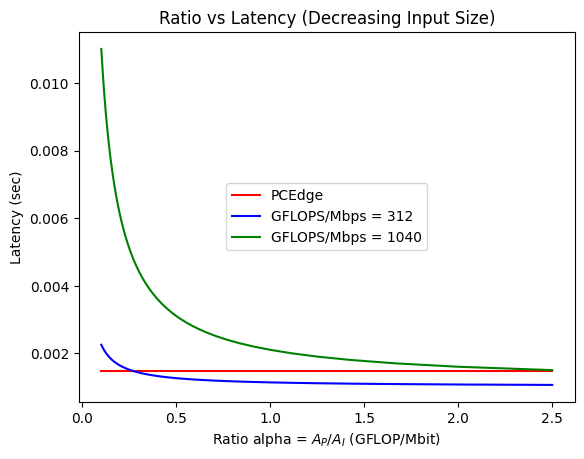

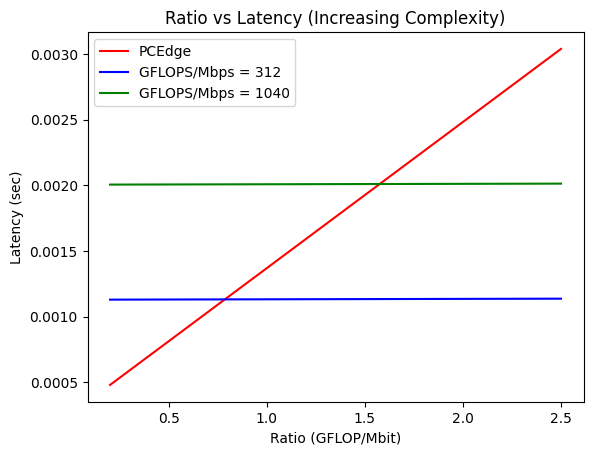

In [ ]:
import matplotlib.pyplot as plt
# Create the plot
fig, ax1 = plt.subplots()

# Plot Ratio Latency
ax1.plot(Ratio_out[0:ind_lat_ENE], PTimePC[0:ind_lat_ENE], 'r-', label='PCEdge')
ax1.plot(Ratio_out[0:ind_lat_ENE], TTimePCGPUNE[0:ind_lat_ENE], 'b-', label='GFLOPS/Mbps = 312' )
# ax1.plot(Ratio_out[0:ind_lat_ENE], TTimeJetsonTPUNE[0:ind_lat_ENE], 'y-', label='GFLOPS/Mbps = 191' )
# ax1.plot(Ratio_out[0:ind_lat_ENE], TTimeJetsonTPUC[0:ind_lat_ENE], 'k-', label='GFLOPS/Mbps = 638' )
ax1.plot(Ratio_out[0:ind_lat_ENE], TTimePCGPUC[0:ind_lat_ENE], 'g-', label='GFLOPS/Mbps = 1040' )
# ax1.plot(Ratio_out[0:ind_lat_ENE], TTimeJetsonCPUNE[0:ind_lat_ENE], 'y-', label='GFLOPS/Mbps = 3.5' )
# ax1.plot(Ratio_out[0:ind_lat_ENE], TTimeRpiCPUC[0:ind_lat_ENE], 'k-', label='GFLOPS/Mbps = 11' )
# plt.yscale('log')
ax1.set_xlabel('Ratio alpha = ${A_P}/{A_I}$ (GFLOP/Mbit)')
ax1.set_ylabel('Latency (sec)')
ax1.tick_params('y')

# # Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='center')

# Create a secondary y-axis
# ax2 = ax1.twinx()
# ax2.plot(Ratio_out[0:ind_lat_ENE], PCostJetson[0:ind_lat_ENE], '.-', label='JetsonEdge')
# ax2.plot(Ratio_out[0:ind_lat_ENE], TCostJetsonGPUNE[0:ind_lat_ENE], '*-', label='GPUNE' )
# # ax2.plot(Ratio_out, TTimeJetsonGPUC[0:ind_cost_ENE], 'g-', label='GPUC' )
# ax2.set_ylabel('Cost ($)')
# ax2.tick_params('y')

# # Display legend
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2
# ax1.legend(lines, labels, loc='upper right')

# Set the title and display the plot
plt.title('Ratio vs Latency (Decreasing Input Size)')
plt.show()

# Create the plot
fig, ax1 = plt.subplots()

# Plot Ratio Latency
ax1.plot(Ratio_model[0:ind_lat_EC], PTimePC[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'r-', label='PCEdge')
ax1.plot(Ratio_model[0:ind_lat_EC], TTimePCGPUNE[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'b-', label='GFLOPS/Mbps = 312' )
ax1.plot(Ratio_model[0:ind_lat_EC], TTimePCGPUC[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'g-', label='GFLOPS/Mbps = 1040' )
# ax1.plot(Ratio_model[0:ind_lat_EC], TTimeJetsonTPUC[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'g-', label='TPUC' )
# plt.yscale('log')
ax1.set_xlabel('Ratio (GFLOP/Mbit)')
ax1.set_ylabel('Latency (sec)')
ax1.tick_params('y')

# Create a secondary y-axis
# ax2 = ax1.twinx()
# ax2.plot(Ratio_model[0:ind_lat_EC], PCostJetson[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], '.-', label='JetsonEdge')
# # ax1.plot(Ratio_model[0:ind_lat_EC], TCostJetsonGPUNE[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'r-', label='GPUNE' )
# ax2.plot(Ratio_model[0:ind_lat_EC], TCostJetsonGPUC[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], '*-', label='GPUC' )
# ax2.set_ylabel('Cost ($)')
# ax2.tick_params('y')

# # Display legend
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2
# ax1.legend(lines, labels, loc='upper left')

# # Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')

# Set the title and display the plot
plt.title('Ratio vs Latency (Increasing Complexity)')
plt.show()

NameError: ignored

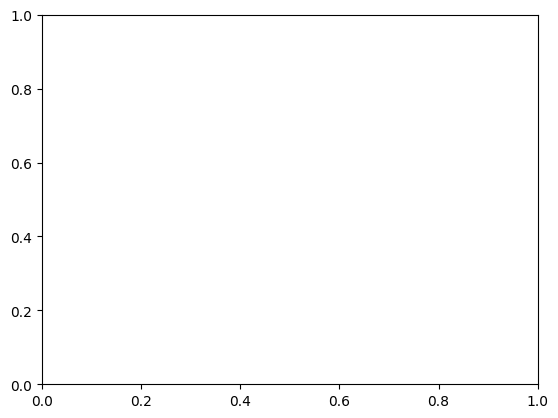

In [ ]:
import matplotlib.pyplot as plt
import math
# Create the plot
# fig, ax1 = plt.subplots()

# # Plot Ratio Cost
# ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], PCostPC[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'r-', label='PCEdge')
# ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], TCostPCGPUNE[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'b-', label='GFLOPS/Mbps = 312' )
# ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], TCostPCGPUC[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'g-', label='GFLOPS/Mbps = 1040' )
# # ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], TCostJetsonTPUNE[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'g-', label='TPUNE' )
# # ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], TCostJetsonCPUNE[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'b-', label='CPUNE' )
# # ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], TCostJetsonGPUC[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'g-', label='GPUC' )
# # plt.yscale('log')
# ax1.set_xlabel('Ratio (GFLOP/Mbit)')
# ax1.set_ylabel('Cost ($)')
# ax1.tick_params('y')

# # # Display legend
# lines, labels = ax1.get_legend_handles_labels()
# ax1.legend(lines, labels, loc='upper right')


# Set the title and display the plot
# plt.title('Ratio vs Cost (Decreasing Input Size)')
# plt.show()

# Create the plot
fig, ax1 = plt.subplots()

# Plot Ratio Latency
ax1.plot(Ratio_model[ind_lat_EC:ind_cost_EC], PCostPC[ind_lat_EC+ind_cost_ENE:ind_cost_ENE+ind_cost_EC], 'r-', label='PCEdge')
ax1.plot(Ratio_model[ind_lat_EC:ind_cost_EC], TCostPCGPUNE[ind_lat_EC+ind_cost_ENE:ind_cost_ENE+ind_cost_EC], 'g-', label='GFLOPS/Mbps = 312' )
ax1.plot(Ratio_model[ind_lat_EC:ind_cost_EC], TCostPCGPUC[ind_lat_EC+ind_cost_ENE:ind_cost_ENE+ind_cost_EC], 'b-', label='GFLOPS/Mbps = 1040' )
# ax1.plot(Ratio_model[ind_lat_EC:ind_cost_EC], TCostJetsonTPUC[ind_lat_EC+ind_cost_ENE:ind_cost_ENE+ind_cost_EC], 'g-', label='TPUC' )
ax1.set_xlabel('Ratio (GFLOP/Mbit)')
ax1.set_ylabel('Cost ($)')
ax1.tick_params('y')

# # Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper right')

#  Set the title and display the plot
plt.title('Ratio vs Cost (Increasing Model Complexity)')
plt.show()

# Plots for latency shift between Edge to NE and Edge to Cloud

In [ ]:
import matplotlib.pyplot as plt
# Create the plot
fig, ax1 = plt.subplots()

# Plot Ratio Latency
ax1.plot(Ratio_out[0:ind_lat_ENE], PTimeJetson[0:ind_lat_ENE], 'r-', label='JetsonEdge')
ax1.plot(Ratio_out[0:ind_lat_ENE], TTimeJetsonGPUNE[0:ind_lat_ENE], 'b-', label='GFLOPS/Mbps = 312' )
# ax1.plot(Ratio_out[0:ind_lat_ENE], TTimeJetsonTPUNE[0:ind_lat_ENE], 'y-', label='GFLOPS/Mbps = 191' )
# ax1.plot(Ratio_out[0:ind_lat_ENE], TTimeJetsonTPUC[0:ind_lat_ENE], 'k-', label='GFLOPS/Mbps = 638' )
ax1.plot(Ratio_out[0:ind_lat_ENE], TTimeJetsonGPUC[0:ind_lat_ENE], 'g-', label='GFLOPS/Mbps = 1040' )
# ax1.plot(Ratio_out[0:ind_lat_ENE], TTimeJetsonCPUNE[0:ind_lat_ENE], 'y-', label='GFLOPS/Mbps = 3.5' )
# ax1.plot(Ratio_out[0:ind_lat_ENE], TTimeJetsonCPUC[0:ind_lat_ENE], 'k-', label='GFLOPS/Mbps = 11' )
# plt.yscale('log')
ax1.set_xlabel('Ratio alpha = ${A_P}/{A_I}$ (GFLOP/Mbit)')
ax1.set_ylabel('Latency (sec)')
ax1.tick_params('y')

# # Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='center')

# Create a secondary y-axis
# ax2 = ax1.twinx()
# ax2.plot(Ratio_out[0:ind_lat_ENE], PCostJetson[0:ind_lat_ENE], '.-', label='JetsonEdge')
# ax2.plot(Ratio_out[0:ind_lat_ENE], TCostJetsonGPUNE[0:ind_lat_ENE], '*-', label='GPUNE' )
# # ax2.plot(Ratio_out, TTimeJetsonGPUC[0:ind_cost_ENE], 'g-', label='GPUC' )
# ax2.set_ylabel('Cost ($)')
# ax2.tick_params('y')

# # Display legend
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2
# ax1.legend(lines, labels, loc='upper right')

# Set the title and display the plot
plt.title('Ratio vs Latency (Decreasing Input Size)')
plt.show()

# Create the plot
fig, ax1 = plt.subplots()

# Plot Ratio Latency
ax1.plot(Ratio_model[0:ind_lat_EC], PTimeJetson[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'r-', label='JetsonEdge')
ax1.plot(Ratio_model[0:ind_lat_EC], TTimeJetsonGPUNE[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'b-', label='GPUNE' )
ax1.plot(Ratio_model[0:ind_lat_EC], TTimeJetsonGPUC[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'g-', label='GPUC' )
# ax1.plot(Ratio_model[0:ind_lat_EC], TTimeJetsonTPUC[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'g-', label='TPUC' )
# plt.yscale('log')
ax1.set_xlabel('Ratio (GFLOP/Mbit)')
ax1.set_ylabel('Latency (sec)')
ax1.tick_params('y')

# Create a secondary y-axis
# ax2 = ax1.twinx()
# ax2.plot(Ratio_model[0:ind_lat_EC], PCostJetson[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], '.-', label='JetsonEdge')
# # ax1.plot(Ratio_model[0:ind_lat_EC], TCostJetsonGPUNE[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'r-', label='GPUNE' )
# ax2.plot(Ratio_model[0:ind_lat_EC], TCostJetsonGPUC[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], '*-', label='GPUC' )
# ax2.set_ylabel('Cost ($)')
# ax2.tick_params('y')

# # Display legend
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2
# ax1.legend(lines, labels, loc='upper left')

# # Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')

# Set the title and display the plot
plt.title('Ratio vs Latency (Increasing Complexity)')
plt.show()




# Plots for cost shift between Edge to NE and Edge to Cloud

In [ ]:
import matplotlib.pyplot as plt
# Create the plot
fig, ax1 = plt.subplots()

# Plot Ratio Cost
ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], PCostJetson[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'r-', label='JetsonEdge')
ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], TCostJetsonGPUNE[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'b-', label='GFLOPS/Mbps = 312' )
ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], TCostJetsonGPUC[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'g-', label='GFLOPS/Mbps = 1040' )
# ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], TCostJetsonTPUNE[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'g-', label='TPUNE' )
# ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], TCostJetsonCPUNE[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'b-', label='CPUNE' )
# ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], TCostJetsonGPUC[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'g-', label='GPUC' )
# plt.yscale('log')
ax1.set_xlabel('Ratio (GFLOP/Mbit)')
ax1.set_ylabel('Cost ($)')
ax1.tick_params('y')

# # Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper right')

# Create a secondary y-axis
# ax2 = ax1.twinx()
# ax2.plot(Ratio_out[0:ind_lat_ENE], PCostJetson[0:ind_lat_ENE], '.-', label='JetsonEdge')
# ax2.plot(Ratio_out[0:ind_lat_ENE], TCostJetsonGPUNE[0:ind_lat_ENE], '*-', label='GPUNE' )
# # ax2.plot(Ratio_out, TTimeJetsonGPUC[0:ind_cost_ENE], 'g-', label='GPUC' )
# ax2.set_ylabel('Cost ($)')
# ax2.tick_params('y')

# # Display legend
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2
# ax1.legend(lines, labels, loc='upper right')

# Set the title and display the plot
plt.title('Ratio vs Cost (Decreasing Input Size)')
plt.show()

# Create the plot
fig, ax1 = plt.subplots()

# Plot Ratio Latency
ax1.plot(Ratio_model[ind_lat_EC:ind_cost_EC], PCostJetson[ind_lat_EC+ind_cost_ENE:ind_cost_ENE+ind_cost_EC], 'r-', label='JetsonEdge')
ax1.plot(Ratio_model[ind_lat_EC:ind_cost_EC], TCostJetsonGPUNE[ind_lat_EC+ind_cost_ENE:ind_cost_ENE+ind_cost_EC], 'g-', label='GPUNE' )
# ax1.plot(Ratio_model[ind_lat_EC:ind_cost_EC], TCostJetsonGPUC[ind_lat_EC+ind_cost_ENE:ind_cost_ENE+ind_cost_EC], 'b-', label='GPUC' )
# ax1.plot(Ratio_model[ind_lat_EC:ind_cost_EC], TCostJetsonTPUC[ind_lat_EC+ind_cost_ENE:ind_cost_ENE+ind_cost_EC], 'g-', label='TPUC' )
ax1.set_xlabel('Ratio (GFLOP/Mbit)')
ax1.set_ylabel('Cost ($)')
ax1.tick_params('y')

# Create a secondary y-axis
# ax2 = ax1.twinx()
# ax2.plot(Ratio_model[0:ind_lat_EC], PCostJetson[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], '.-', label='JetsonEdge')
# # ax1.plot(Ratio_model[0:ind_lat_EC], TCostJetsonGPUNE[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'r-', label='GPUNE' )
# ax2.plot(Ratio_model[0:ind_lat_EC], TCostJetsonGPUC[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], '*-', label='GPUC' )
# ax2.set_ylabel('Cost ($)')
# ax2.tick_params('y')

# # Display legend
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2
# ax1.legend(lines, labels, loc='upper left')

# # Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')

# Set the title and display the plot
plt.title('Ratio vs Latency (Increasing Complexity)')
plt.show()

# Plots for TPU at NE and Cloud

In [ ]:
import matplotlib.pyplot as plt
# Create the plot
fig, ax1 = plt.subplots()

# Plot Ratio Latency
ax1.plot(Ratio_out[0:ind_lat_ENE], PTimeJetson[0:ind_lat_ENE], 'r-', label='JetsonEdge')
ax1.plot(Ratio_out[0:ind_lat_ENE], TTimeJetsonTPUNE[0:ind_lat_ENE], 'b-', label='TPUNE' )
# ax1.plot(Ratio_out[0:ind_lat_ENE], TTimeJetsonGPUC[0:ind_lat_ENE], 'g-', label='GPUC' )
# plt.yscale('log')
ax1.set_xlabel('Ratio (GFLOP/Mbit)')
ax1.set_ylabel('Latency (sec)')
ax1.tick_params('y')

# # Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='center')

# Create a secondary y-axis
# ax2 = ax1.twinx()
# ax2.plot(Ratio_out[0:ind_lat_ENE], PCostJetson[0:ind_lat_ENE], '.-', label='JetsonEdge')
# ax2.plot(Ratio_out[0:ind_lat_ENE], TCostJetsonGPUNE[0:ind_lat_ENE], '*-', label='GPUNE' )
# # ax2.plot(Ratio_out, TTimeJetsonGPUC[0:ind_cost_ENE], 'g-', label='GPUC' )
# ax2.set_ylabel('Cost ($)')
# ax2.tick_params('y')

# # Display legend
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2
# ax1.legend(lines, labels, loc='upper right')

# Set the title and display the plot
plt.title('Ratio vs Latency (Decreasing Input Size)')
plt.show()

# Create the plot
fig, ax1 = plt.subplots()

# Plot Ratio Latency
ax1.plot(Ratio_model[0:ind_lat_EC], PTimeJetson[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'r-', label='JetsonEdge')
# ax1.plot(Ratio_model[0:ind_lat_EC], TTimeJetsonGPUNE[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'b-', label='GPUNE' )
ax1.plot(Ratio_model[0:ind_lat_EC], TTimeJetsonTPUC[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'g-', label='TPUC' )
# plt.yscale('log')
ax1.set_xlabel('Ratio (GFLOP/Mbit)')
ax1.set_ylabel('Latency (sec)')
ax1.tick_params('y')

# Create a secondary y-axis
# ax2 = ax1.twinx()
# ax2.plot(Ratio_model[0:ind_lat_EC], PCostJetson[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], '.-', label='JetsonEdge')
# # ax1.plot(Ratio_model[0:ind_lat_EC], TCostJetsonGPUNE[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'r-', label='GPUNE' )
# ax2.plot(Ratio_model[0:ind_lat_EC], TCostJetsonGPUC[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], '*-', label='GPUC' )
# ax2.set_ylabel('Cost ($)')
# ax2.tick_params('y')

# # Display legend
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2
# ax1.legend(lines, labels, loc='upper left')

# # Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')

# Set the title and display the plot
plt.title('Ratio vs Latency (Increasing Complexity)')
plt.show()




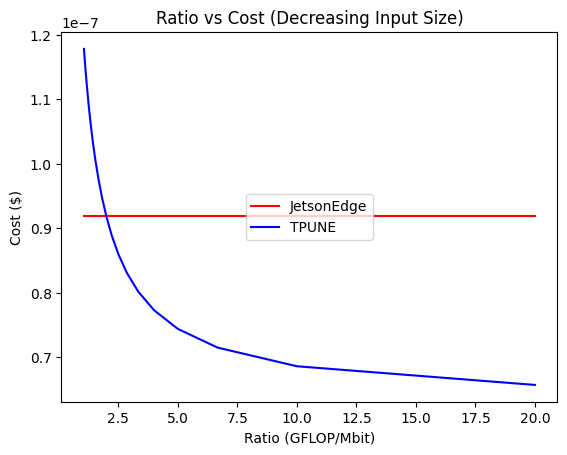

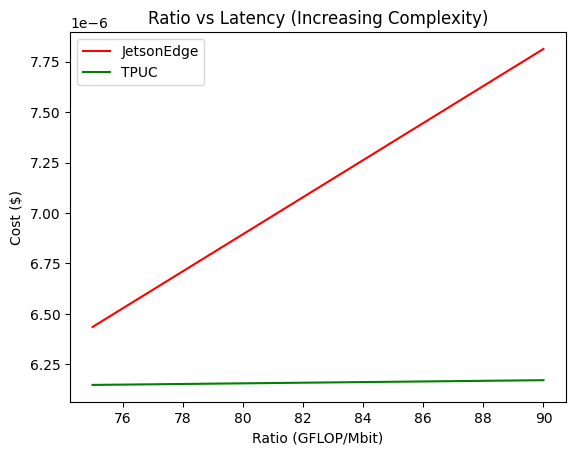

In [ ]:
import matplotlib.pyplot as plt
# Create the plot
fig, ax1 = plt.subplots()

# Plot Ratio Cost
ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], PCostJetson[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'r-', label='JetsonEdge')
ax1.plot(Ratio_out[ind_lat_ENE:ind_cost_ENE], TCostJetsonTPUNE[ind_lat_ENE+ind_lat_EC:ind_lat_EC+ind_cost_ENE], 'b-', label='TPUNE' )
# ax1.plot(Ratio_out[0:ind_lat_ENE], TCostJetsonGPUC[0:ind_lat_ENE], 'g-', label='GPUC' )
# plt.yscale('log')
ax1.set_xlabel('Ratio (GFLOP/Mbit)')
ax1.set_ylabel('Cost ($)')
ax1.tick_params('y')

# # Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='center')

# Create a secondary y-axis
# ax2 = ax1.twinx()
# ax2.plot(Ratio_out[0:ind_lat_ENE], PCostJetson[0:ind_lat_ENE], '.-', label='JetsonEdge')
# ax2.plot(Ratio_out[0:ind_lat_ENE], TCostJetsonGPUNE[0:ind_lat_ENE], '*-', label='GPUNE' )
# # ax2.plot(Ratio_out, TTimeJetsonGPUC[0:ind_cost_ENE], 'g-', label='GPUC' )
# ax2.set_ylabel('Cost ($)')
# ax2.tick_params('y')

# # Display legend
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2
# ax1.legend(lines, labels, loc='upper right')

# Set the title and display the plot
plt.title('Ratio vs Cost (Decreasing Input Size)')
plt.show()

# Create the plot
fig, ax1 = plt.subplots()

# Plot Ratio Latency
ax1.plot(Ratio_model[ind_lat_EC:ind_cost_EC], PCostJetson[ind_lat_EC+ind_cost_ENE:ind_cost_ENE+ind_cost_EC], 'r-', label='JetsonEdge')
# ax1.plot(Ratio_model[ind_lat_EC:ind_cost_EC], TCostJetsonGPUNE[ind_lat_EC+ind_cost_ENE:ind_cost_ENE+ind_cost_EC], 'b-', label='GPUNE' )
ax1.plot(Ratio_model[ind_lat_EC:ind_cost_EC], TCostJetsonTPUC[ind_lat_EC+ind_cost_ENE:ind_cost_ENE+ind_cost_EC], 'g-', label='TPUC' )
ax1.set_xlabel('Ratio (GFLOP/Mbit)')
ax1.set_ylabel('Cost ($)')
ax1.tick_params('y')

# Create a secondary y-axis
# ax2 = ax1.twinx()
# ax2.plot(Ratio_model[0:ind_lat_EC], PCostJetson[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], '.-', label='JetsonEdge')
# # ax1.plot(Ratio_model[0:ind_lat_EC], TCostJetsonGPUNE[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], 'r-', label='GPUNE' )
# ax2.plot(Ratio_model[0:ind_lat_EC], TCostJetsonGPUC[ind_lat_ENE:ind_lat_ENE+ind_lat_EC], '*-', label='GPUC' )
# ax2.set_ylabel('Cost ($)')
# ax2.tick_params('y')

# # Display legend
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2
# ax1.legend(lines, labels, loc='upper left')

# # Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')

# Set the title and display the plot
plt.title('Ratio vs Latency (Increasing Complexity)')
plt.show()

# Plots

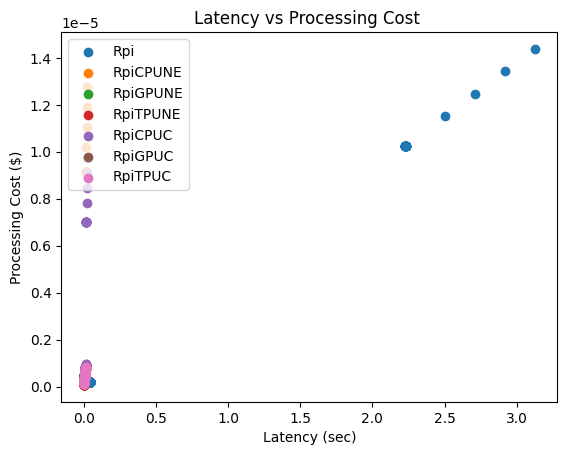

In [ ]:
import matplotlib.pyplot as plt
# Create the plot
fig, ax1 = plt.subplots()

# Plot PCostperImage vs ResponseTime
ax1.scatter(PTimeRpi, PCostRpi, label='Rpi')
# ax1.scatter(PTimePC, PCostPC, label='PC')
ax1.scatter(TTimeRpiCPUNE, TCostRpiCPUNE, label='RpiCPUNE')
ax1.scatter(TTimeRpiGPUNE, TCostRpiGPUNE, label='RpiGPUNE')
ax1.scatter(TTimeRpiTPUNE, TCostRpiTPUNE, label='RpiTPUNE')
ax1.scatter(TTimeRpiCPUC, TCostRpiCPUC, label='RpiCPUC')
ax1.scatter(TTimeRpiGPUC, TCostRpiGPUC, label='RpiGPUC')
ax1.scatter(TTimeRpiTPUC, TCostRpiTPUC, label='RpiTPUC')

ax1.set_xlabel('Latency (sec)')
ax1.set_ylabel('Processing Cost ($)')
ax1.tick_params('y')

# Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')

# Set the title and display the plot
plt.title('Latency vs Processing Cost ')
plt.show()

# Latency vs Processing Cost and Total Cost

* Raspberry pi at edge.
* CPU/GPU/TPU at NE and Cloud

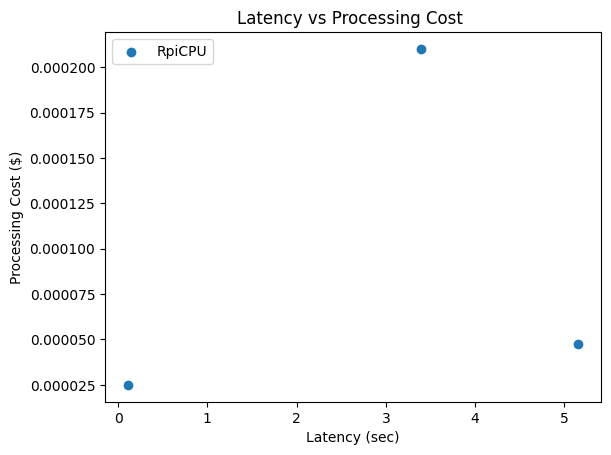

[5.15855408 0.10590811 3.3958235 ]
[4.74726772e-05 2.49283241e-05 2.10104114e-04]


In [ ]:

import matplotlib.pyplot as plt
# Create the plot
fig, ax1 = plt.subplots()

# Plot PCostperImage vs ResponseTime
ax1.scatter(np.concatenate([PTimeRpi, TTimeRpiCPUNE, TTimeRpiCPUC]),  np.concatenate([PCostRpi, TCostRpiCPUNE, TCostRpiCPUC]), label='RpiCPU')
# ax1.scatter(PTimePC, PCostPC, label='PC')
# ax1.scatter(TTimeRpiCPUNE, TCostRpiCPUNE, label='RpiCPUNE')
# ax1.scatter(TTimeRpiGPUNE, TCostRpiGPUNE, label='RpiGPUNE')
# ax1.scatter(TTimeRpiTPUNE, TCostRpiTPUNE, label='RpiTPUNE')
# ax1.scatter(TTimeRpiCPUC, TCostRpiCPUC, label='RpiCPUC')
# ax1.scatter(TTimeRpiGPUC, TCostRpiGPUC, label='RpiGPUC')
# ax1.scatter(TTimeRpiTPUC, TCostRpiTPUC, label='RpiTPUC')

ax1.set_xlabel('Latency (sec)')
ax1.set_ylabel('Processing Cost ($)')
ax1.tick_params('y')

# Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')

# Set the title and display the plot
plt.title('Latency vs Processing Cost ')
plt.show()

print(np.concatenate([PTimeRpi, TTimeRpiCPUNE, TTimeRpiCPUC]))
print(np.concatenate([PCostRpi, TCostRpiCPUNE, TCostRpiCPUC]))

# Latency vs Processing Cost and Total Cost per Image

* PC at edge.
* CPU/GPU/TPU at NE and C0+9------------------......................0loud0

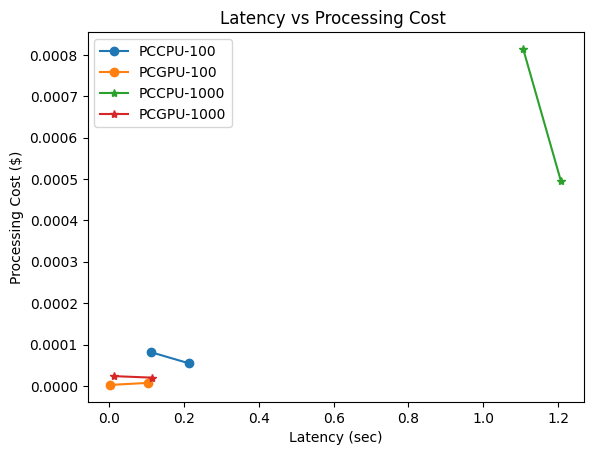

In [ ]:
import matplotlib.pyplot as plt
# Create the plot
fig, ax1 = plt.subplots()
marker = ['o-','*-']
# Plot PCostperImage vs ResponseTime
for i in range(len(Model_Size)):
  ax1.plot([ TTimePCCPUNE[i], TTimePCCPUC[i]],  [  TCostPCCPUNE[i], TCostPCCPUC[i]], marker[i], label='PCCPU-' + str(Model_Size[i]))
  # ax1.plot([ TTimePCTPUNE[i], TTimePCTPUC[i]],  [  TCostPCTPUNE[i], TCostPCTPUC[i]], marker[i], label='PCTPU-' + str(Model_Size[i]))
  ax1.plot([ TTimePCGPUNE[i], TTimePCGPUC[i]],  [  TCostPCGPUNE[i], TCostPCGPUC[i]], marker[i], label='PCGPU-' + str(Model_Size[i]))
  # ax1.plot([PTimePC[i], TTimePCTPUNE[i], TTimePCTPUC[i]],  [ PCostPC[i], TCostPCTPUNE[i], TCostPCTPUC[i]], marker[i], label='PCTPU-' + str(Model_Size[i]))
  # ax1.plot([PTimePC[i], TTimePCGPUNE[i], TTimePCGPUC[i]],  [ PCostPC[i], TCostPCGPUNE[i], TCostPCGPUC[i]], marker[i], label='PCGPU-' + str(Model_Size[i]))

ax1.set_xlabel('Latency (sec)')
ax1.set_ylabel('Processing Cost ($)')
ax1.tick_params('y')

# Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')

# Set the title and display the plot
plt.title('Latency vs Processing Cost ')
plt.show()

# print(np.concatenate([TTimePCCPUNE, TTimePCTPUC]))
# print(np.concatenate([TCostPCCPUNE, TCostPCTPUC]))

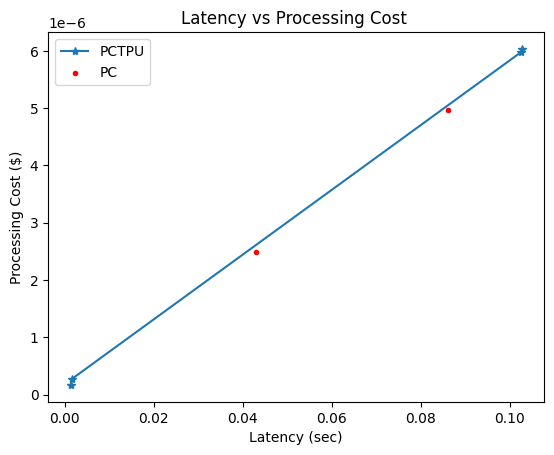

[0.01220457 0.02325862 0.10240608 0.10260794]
[8.20972714e-06 1.63528732e-05 5.97511528e-06 6.03567211e-06]


In [ ]:
import matplotlib.pyplot as plt
# Create the plot
fig, ax1 = plt.subplots()

# Plot PCostperImage vs ResponseTime
# ax1.plot(np.concatenate([ TTimePCCPUNE, TTimePCCPUC]),  np.concatenate([ TCostPCCPUNE, TCostPCCPUC]), 'o-', label='PCCPU')
ax1.plot(np.concatenate([ TTimePCTPUNE, TTimePCTPUC]),  np.concatenate([ TCostPCTPUNE, TCostPCTPUC]), '*-', label='PCTPU')
# ax1.plot(np.concatenate([ TTimePCGPUNE, TTimePCGPUC]),  np.concatenate([ TCostPCGPUNE, TCostPCGPUC]), 'o-', label='PCGPU')
# ax1.plot(np.concatenate([TTimePCCPUNE, TTimePCGPUC]),  np.concatenate([TCostPCCPUNE, TCostPCGPUC]), 'o-', label='PCGPU')
ax1.scatter(PTimePC, PCostPC, marker='.', color='r', label='PC')
# ax1.scatter(TTimeRpiCPUNE, TCostRpiCPUNE, label='RpiCPUNE')
# ax1.scatter(TTimeRpiGPUNE, TCostRpiGPUNE, label='RpiGPUNE')
# ax1.scatter(TTimeRpiTPUNE, TCostRpiTPUNE, label='RpiTPUNE')
# ax1.scatter(TTimeRpiCPUC, TCostRpiCPUC, label='RpiCPUC')
# ax1.scatter(TTimeRpiGPUC, TCostRpiGPUC, label='RpiGPUC')
# ax1.scatter(TTimeRpiTPUC, TCostRpiTPUC, label='RpiTPUC')

ax1.set_xlabel('Latency (sec)')
ax1.set_ylabel('Processing Cost ($)')
ax1.tick_params('y')

# Display legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')

# Set the title and display the plot
plt.title('Latency vs Processing Cost ')
plt.show()

print(np.concatenate([TTimePCCPUNE, TTimePCTPUC]))
print(np.concatenate([TCostPCCPUNE, TCostPCTPUC]))

# Effect of Utilization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import csv


def save_values_to_csv(filename, data):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['EeP', 'A_p', 'k', 'alpha_values', 'UtilizationEdge', 'latency_NE', 'latency_edge_plus', 'latency_edge_minus'])
        for row in data:
            writer.writerow(row)


def read_data_from_csv(filename):
    data = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip the header row
        for row in reader:
            data.append([float(val) for val in row])
    return data


def compute_latency_NE(EetoNE, PDEtoNE, A_I, NEnP, UtilizationNE, A_p):
    latency = (A_I / EetoNE) + PDEtoNE + (A_p / NEnP) + ((UtilizationNE * A_p) / (2 * NEnP * (1 - UtilizationNE)))
    return latency

def compute_latency_Edge( NEnP, UtilizationNE, A_p, k):
    z = (2 - UtilizationNE) / (2 * (1 - UtilizationNE))
    latency = (k * A_p * z )/ NEnP
    return latency

def compute_latency_Cloud(EetoC, PDEtoC, A_I, CrP, A_p):
    latency = (A_I / EetoC) + PDEtoC + (A_p / CrP)
    return latency

def calculate_alpha_max_latency(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE):
    delta_n = NEnP / EetoNE + (PDEtoNE * NEnP) / A_I
    z = (2 - UtilizationNE) / (2 * (1 - UtilizationNE))
    gamma = NEnP/EeP
    k_min = gamma
    print(k_min)
    alpha_max =  (delta_n / (z * (k_min -1)))
    return alpha_max

def calculate_k_min(NEnP, UtilizationNE, EeP):
    k_min = (NEnP * UtilizationNE) / EeP
    return k_min // 1


def find_satisfying_k(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE, A_p):

    delta_n = NEnP / EetoNE + (PDEtoNE * NEnP) / A_I
    z = (2 - UtilizationNE) / (2 * (1 - UtilizationNE))
    alpha = A_p / A_I
    k = 1 + (delta_n / (z * alpha))
    return k

def compute_UtilizationEdge_latency(EeP, NEnP, UtilizationNE,k):
  gama = NEnP/EeP
  return gama*UtilizationNE/k

def plot_k_vs_alpha_latency(EeP_Values, NEnP, EetoNE, PDEtoNE, A_I_Values, UtilizationNE):
    data = []
    for EeP in EeP_Values:
        alpha_max_latency = calculate_alpha_max_latency(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE)
        A_p_max_latency = A_I * alpha_max_latency
        alpha_values_latency = []
        k_values_latency = []
        latency_edge_plus = []
        latency_edge_minus = []
        latency_NE = []
        latency_edge = []
        UtilizationEdge_latency = []
        A_P = np.linspace(0, A_p_max_latency, 11)[1:]
        for A_p in A_P:
            k = find_satisfying_k(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE, A_p)
            alpha_values_latency.append(A_p / A_I)
            k_values_latency.append(k)
            latency_NE.append(compute_latency_NE(EetoNE, PDEtoNE, A_I, NEnP, UtilizationNE, A_p))
            latency_edge.append(compute_latency_Edge(NEnP, UtilizationNE, A_p,k))
            latency_edge_plus.append(compute_latency_Edge(NEnP, UtilizationNE, A_p,k+0.5))
            latency_edge_minus.append(compute_latency_Edge(NEnP, UtilizationNE, A_p,k-0.5))
            UtilizationEdge_latency.append(compute_UtilizationEdge_latency(EeP, NEnP, UtilizationNE,k))
        print(latency_NE)
        print(latency_edge)
        print(latency_edge_plus)
        print(latency_edge_minus)
        print(alpha_values_latency)
        print(k_values_latency)
        print(UtilizationEdge_latency)


        # Append the values for the current run to the data list
        data.extend([[EeP, A_P[i], k_values_latency[i], alpha_values_latency[i], UtilizationEdge_latency[i], latency_NE[i], latency_edge_plus[i], latency_edge_minus[i]] for i in range(len(A_P))])

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()

        ax1.plot(alpha_values_latency, k_values_latency, 'k-', label = 'k')

        # ax2.plot(alpha_values, UtilizationEdge, 'r-')
        ax2.plot(alpha_values_latency, latency_NE, 'r-', label = 'Edge/NE:k')
        ax2.plot(alpha_values_latency, latency_edge_plus, 'b-', label = 'Edge:k+0.5')
        ax2.plot(alpha_values_latency, latency_edge_minus, 'g-', label = 'Edge:k-0.5')
        # ax2.plot(alpha_values, latency_NE_plus, 'b-', label = 'NE:k+1')
        # ax2.plot(alpha_values, latency_NE_minus, 'g-', label = 'NE:k-1')
        ax1.set_xlabel('alpha')
        ax1.set_ylabel('Multiplexing factor k', color='k')
        ax2.set_ylabel('Latency (sec)', color='r')
        # ax2.set_ylabel('latency_NE', color='g')

        # Display legend
        lines, labels = ax1.get_legend_handles_labels()
        ax1.legend(lines, labels, loc='upper left')
        lines, labels = ax2.get_legend_handles_labels()
        ax2.legend(lines, labels, loc='upper center')
        plt.title('k vs alpha with latency')
        # Save the first plot
        plt.savefig(str(NEnP) + '_' +str(EeP) + '_L.png')
        plt.show()



    # Save the data to a CSV file
    save_values_to_csv('k_vs_alpha_latency.csv', data)




def compute_cost_NE(EetoNE, PDEtoNE, A_I, NEnP, UtilizationNE, A_p, NEnC, NTrC):
    term1 = (A_I / EetoNE) + PDEtoNE
    term2 = ((A_p / NEnP) + ((UtilizationNE * A_p) / (2 * NEnP * (1 - UtilizationNE))))
    cost_NE = ((term1 * NTrC) + (term2 * (NEnC / UtilizationNE)))
    return cost_NE

def compute_cost_Edge( NEnP, UtilizationNE, A_p, NEnC, km):
    z = (2 - UtilizationNE) / (2 * (1 - UtilizationNE))
    cost = (km * A_p * z * NEnC)/ (UtilizationNE*NEnP)
    return cost

def calculate_m_min(EeC, UtilizationNE, NEnC):
    m_min = (EeC * UtilizationNE) / NEnC
    return m_min

def calculate_alpha_max_cost(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE,EeC,NEnC,NTrC):
    delta_n = NEnP / EetoNE + (PDEtoNE * NEnP) / A_I
    z = (2 - UtilizationNE) / (2 * (1 - UtilizationNE))
    gamma = NEnP/EeP
    beta = EeC/NEnC
    delta_c = NTrC/NEnC
    # print(((gamma*beta)**(1/2)) * UtilizationNE)
    print((gamma*beta))
    alpha_max =  ((delta_n * delta_c * UtilizationNE)/ (z * ((gamma*beta) -1)))
    return alpha_max

def find_satisfying_km_cost(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE, A_p,EeC,NEnC,NTrC):

    delta_n = (NEnP / EetoNE) + ((PDEtoNE * NEnP) / A_I)
    z = (2 - UtilizationNE) / (2 * (1 - UtilizationNE))
    alpha = A_p / A_I
    beta = EeC/NEnC
    delta_c = NTrC/NEnC
    km = 1 + ((delta_n * UtilizationNE * delta_c) / (z * alpha))
    return km

def compute_UtilizationEdge_cost(EeP, NEnP, UtilizationNE,EeC, NEnC, km):
  gama = NEnP/EeP
  beta = EeC/NEnC
  return (((gama*beta)/km) ** (1/2)) * UtilizationNE

def compute_k_cost(EeP, NEnP,EeC, NEnC, km):
  gama = NEnP/EeP
  beta = EeC/NEnC
  return (((gama*km)/beta) ** (1/2))

def plot_k_vs_alpha_cost(EeP_Values, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE,EeC_Values,NEnC,NTrC):
    data = []
    for i in range(len(EeP_Values)):
        EeP = EeP_Values[i]
        EeC = EeC_Values[i]

        # alpha_max = calculate_alpha_max_latency(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE)
        # # print(alpha_max)
        alpha_max = calculate_alpha_max_cost(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE,EeC,NEnC,NTrC)
        # print(alpha_max)
        A_p_max = A_I * alpha_max
        alpha_values = []
        km_values = []
        k_values_cost = []
        cost_edge_plus = []
        cost_edge_minus = []
        cost_NE_plus = []
        cost_NE_minus = []
        cost_NE = []
        cost_edge = []
        UtilizationEdge_cost = []
        UtilizationEdge_latency = []
        A_P = np.linspace(0, A_p_max, 11)[1:]
        for A_p in A_P:
            # k = calculate_k_min(NEnP, UtilizationNE, EeP)
            # k = find_satisfying_k(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE, A_p)
            km = find_satisfying_km_cost(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE, A_p,EeC,NEnC,NTrC)
            alpha_values.append(A_p / A_I)
            km_values.append(km)
            cost_NE.append(compute_cost_NE(EetoNE, PDEtoNE, A_I, NEnP, UtilizationNE, A_p,NEnC,NTrC))
            cost_edge.append(compute_cost_Edge( NEnP, UtilizationNE, A_p, NEnC, km ))
            cost_edge_plus.append(compute_cost_Edge( NEnP, UtilizationNE, A_p, NEnC, km + 0.1 ))
            cost_edge_minus.append(compute_cost_Edge( NEnP, UtilizationNE, A_p, NEnC, km - 0.1 ))
            k_values_cost.append(compute_k_cost(EeP, NEnP,EeC, NEnC, km))
            UtilizationEdge_cost.append(compute_UtilizationEdge_cost(EeP, NEnP, UtilizationNE,EeC,NEnC,km))
            # UtilizationEdge_latency.append(compute_UtilizationEdge_latency(EeP, NEnP, UtilizationNE,k+1))
        print(cost_NE)
        print(cost_edge)
        print(cost_edge_plus)
        print(cost_edge_minus)
        print(alpha_values)
        print(km_values)
        print(UtilizationEdge_cost)
        print(UtilizationEdge_latency)
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()

        ax1.plot(alpha_values, km_values, 'k-', label = 'km')
        # ax1.plot(alpha_values, k_values_cost, 'k-', label = 'k')

        # ax2.plot(alpha_values, UtilizationEdge, 'r-')
        ax2.plot(alpha_values, cost_edge, 'r-', label = 'Edge/NE:km')
        ax2.plot(alpha_values, cost_edge_plus, 'b-', label = 'Edge:km+0.1')
        ax2.plot(alpha_values, cost_edge_minus, 'g-', label = 'Edge:km-0.1')
        # ax2.plot(alpha_values, latency_NE_plus, 'b-', label = 'NE:k+1')
        # ax2.plot(alpha_values, latency_NE_minus, 'g-', label = 'NE:k-1')
        ax1.set_xlabel('alpha')
        ax1.set_ylabel('Multiplexing factor km', color='k')
        ax2.set_ylabel('Cost ($)', color='r')
        # ax2.set_ylabel('latency_NE', color='g')

        # Display legend
        lines, labels = ax1.get_legend_handles_labels()
        ax1.legend(lines, labels, loc='upper left')
        lines, labels = ax2.get_legend_handles_labels()
        ax2.legend(lines, labels, loc='upper center')
        plt.title('k vs alpha with cost')
        # Save the first plot
        plt.savefig(str(NEnP) + '_' + str(EeP) + '_C.png')
        plt.show()





Rpi = [24, 8, 1000, 1.840542 * 10 ** -6]
PC = [900, 128, 10000, 1.155 * 10 ** -5]
Jetson = [512, 4, 1000, 1.88266 * 10 ** -5]
CPU = [3500, 60, 10000, 0.000442]
GPU = [312000, 320, 400000, 0.0011378 ]
TPU = [191667, 192, 50000, 0.0003]

EeP = 900
EeP_Values = [PC[0], Jetson[0], Rpi[0]]
NEnP = GPU[0]
EetoNE = 1000
PDEtoNE = 0.001
A_I = 100
A_I_Values =  [10,50,100]
UtilizationNE = 0.75


EeC_Values = [PC[3], Jetson[3], Rpi[3]]
NEnC = GPU[3]
NTrC = 5.787 * 10 ** -5

plot_k_vs_alpha_latency(EeP_Values, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE)
plot_k_vs_alpha_cost(EeP_Values, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE,EeC_Values,NEnC,NTrC)


# Effect of ratio alpha

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import csv

def compute_k(NEnP,EeP,UtilizationNE,UtilizationEdge):
  return (NEnP*UtilizationNE)/(EeP*UtilizationEdge)

def compute_s(CrP, NEnP, UtilizationNE):
  return CrP / (NEnP*UtilizationNE)

def compute_latency_Edge(AP, CrP, k, s):
  return (k*s*AP)/CrP

def compute_latency_NE(AP, CrP, s, AI, EetoNE, PDEtoNE):
  return (AI/EetoNE) + PDEtoNE + ((s*AP)/CrP)

def compute_latency_Cloud(AP, CrP, s, AI, EetoC, PDEtoC):
  return (AI/EetoC) + PDEtoC + (AP/CrP)

def find_satisfying_AP_latency_AP_Edge_NE(s,k,AI,CrP,EetoNE,PDEtoNE):
  delta_n = (CrP/EetoNE) + (PDEtoNE * CrP)/AI
  alpha = delta_n/((k-1)*s)
  # print('c1 = ' + str((PDEtoNE * CrP)/((k-1)*s)))
  # print('m1 = ' + str(CrP/(EetoNE * (k-1)*s)))
  return alpha * AI

def find_satisfying_AP_latency_AP_Edge_Cloud(s,k,AI,CrP,EetoC,PDEtoC):
  delta_t = (CrP/EetoC) + (PDEtoC * CrP)/AI
  alpha = delta_t/((k*s)-1)
  # print('c2 = ' + str((PDEtoC * CrP)/((k*s) - 1)))
  # print('m2 = ' + str(CrP/(EetoC * ((k*s) - 1))))
  return alpha * AI

def find_satisfying_AP_latency_AP_NE_Cloud(s,k,AI,CrP,EetoC,PDEtoC):
  delta_t = (CrP/EetoC) + (PDEtoC * CrP)/AI
  delta_n = (CrP/EetoNE) + (PDEtoNE * CrP)/AI
  alpha = (delta_t - delta_n)/(s-1)
  # print('c3 = ' + str((((PDEtoC * CrP) - (PDEtoNE * CrP))/(s-1))))
  # print('m3 = ' + str(((CrP/(EetoC)) - (CrP/(EetoNE))) / (s - 1)))
  return alpha * AI


def identify_region_B_D(AI, AP, m1, c1, m2, c2, m3, c3):
  # m1 < m2 < m3 and c1 < c2 < c3
    AP1 = m1 * AI + c1
    AP2 = m2 * AI + c2
    AP3 = m3 * AI + c3

    if AP > max(AP1,AP2,AP3): # 1
        return "C < NE < E"
    elif AP < min(AP1,AP2,AP3): # 4
        return "E < NE < C"
    elif AP1 < AP < AP2:
        if AI > (c2 - c1) / (m1 - m2): # 3
            return "NE < E < C"
        else:
            return "Negative"
    elif AP2 < AP < AP3: # 2
        if AI > (c3 - c2) / (m2 - m3):
            return "NE < C < E"
        else:
            return "Negative"
    elif AP == AP1:
        return "E=NE"
    elif AP == AP2:
        return "E=C"
    elif AP == AP3:
        return "NE=C"
    elif AP1 == AP2 == AP:
        return "E=NE=C"
    elif AP2 == AP3 == AP:
        return "E=NE=C"
    elif AP3 == AP1 == AP:
        return "E=NE=C"
    else:
        return "Unknown region"

def identify_region_A_D(AI, AP, m1, c1, m2, c2, m3, c3):
  # m1 > m2 > m3 and c1 < c2 < c3
    AP1 = m1 * AI + c1
    AP2 = m2 * AI + c2
    AP3 = m3 * AI + c3

    if AP > max(AP1,AP2,AP3): # 1 "C < NE < E"
        return 1
    elif AP < min(AP1,AP2,AP3): # 4 "E < NE < C"
        return 4
    elif AP1 < AP < AP2:
        if AI < (c1 - c2) / (m2 - m1): # 2 "C < E < NE"
            return 2
        else: # 5 "NE < E < C"
            return 5
    elif AP2 < AP < AP3: # 3 "E < C <NE"
        if AI > (c3 - c2) / (m2 - m3):
            return 3
        else: # 6 "NE < C < E"
            return 6
    elif AP == AP1:
        return "E=NE"
    elif AP == AP2:
        return "E=C"
    elif AP == AP3:
        return "NE=C"
    elif AP1 == AP2 == AP:
        return "E = NE = C"
    elif AP2 == AP3 == AP:
        return "E = NE = C"
    elif AP3 == AP1 == AP:
        return "E = NE = C"
    else:
        return "Unknown region"



def plot_latency_vs_AI(AI_Values, CrP, k, s, EetoNE, EetoC, PDEtoNE, PDEtoC):

  alpha_values_latency = []
  AP_Edge_equal_NE = []
  AP_Edge_equal_Cloud = []
  AP_NE_equal_Cloud = []
  latency_Edge_equal_NE = []
  latency_Edge_equal_Cloud = []
  latency_NE_equal_Cloud = []
  for AI in AI_Values:
    AP = find_satisfying_AP_latency_AP_Edge_NE(s,k,AI,CrP,EetoNE,PDEtoNE)
    latency_Edge_equal_NE.append(compute_latency_Edge(AP, CrP, k, s))
    AP_Edge_equal_NE.append(AP)

    AP = find_satisfying_AP_latency_AP_Edge_Cloud(s,k,AI,CrP,EetoC,PDEtoC)
    AP_Edge_equal_Cloud.append(AP)
    latency_Edge_equal_Cloud.append(compute_latency_Edge(AP, CrP, k, s))

    AP = find_satisfying_AP_latency_AP_NE_Cloud(s,k,AI,CrP,EetoC,PDEtoC)
    AP_NE_equal_Cloud.append(AP)
    latency_NE_equal_Cloud.append(compute_latency_Cloud(AP, CrP, s, AI, EetoC, PDEtoC))

  print(latency_Edge_equal_NE)
  print(latency_Edge_equal_Cloud)
  print(latency_NE_equal_Cloud)

  print(AP_Edge_equal_NE)
  print(AP_Edge_equal_Cloud)
  print(AP_NE_equal_Cloud)

  fig, ax1 = plt.subplots()
  # ax2 = ax1.twinx()

  # ax1.plot(alpha_values_latency, k_values_latency, 'k-', label = 'k')

  # ax2.plot(alpha_values, UtilizationEdge, 'r-')

  ax1.plot(AI_Values, latency_Edge_equal_NE, 'r-', label = 'Edge=NE')
  ax1.plot(AI_Values, latency_Edge_equal_Cloud, 'b-', label = 'Edge=Cloud')
  ax1.plot(AI_Values, latency_NE_equal_Cloud, 'g-', label = 'NE=Cloud')
  ax1.set_xlabel('AI (Mbit)')
  ax1.set_ylabel('latency (sec)', color='r')

  # Display legend
  lines, labels = ax1.get_legend_handles_labels()
  ax1.legend(lines, labels, loc='upper left')
  plt.xlim(left=0)
  plt.ylim(bottom=0)
  plt.title('AP with AI')
  # Save the first plot
  # plt.savefig('Latency.png')
  plt.show()

def plot_AP_vs_AI(AI_Values, CrP, k, s, EetoNE, EetoC, PDEtoNE, PDEtoC,device,NE,Cloud):

    alpha_Edge_equal_NE = []
    alpha_Edge_equal_Cloud = []
    alpha_NE_equal_Cloud = []
    AP_Edge_equal_NE = []
    AP_Edge_equal_Cloud = []
    AP_NE_equal_Cloud = []
    latency_Edge_equal_NE = []
    latency_Edge_equal_Cloud = []
    latency_NE_equal_Cloud = []
    for AI in AI_Values:
      AP = find_satisfying_AP_latency_AP_Edge_NE(s,k,AI,CrP,EetoNE,PDEtoNE)
      latency_Edge_equal_NE.append(compute_latency_Edge(AP, CrP, k, s))
      alpha_Edge_equal_NE.append(AP/AI)
      AP_Edge_equal_NE.append(AP)

      AP = find_satisfying_AP_latency_AP_Edge_Cloud(s,k,AI,CrP,EetoC,PDEtoC)
      AP_Edge_equal_Cloud.append(AP)
      alpha_Edge_equal_Cloud.append(AP/AI)
      latency_Edge_equal_Cloud.append(compute_latency_Edge(AP, CrP, k, s))

      AP = find_satisfying_AP_latency_AP_NE_Cloud(s,k,AI,CrP,EetoC,PDEtoC)
      AP_NE_equal_Cloud.append(AP)
      alpha_NE_equal_Cloud.append(AP/AI)
      latency_NE_equal_Cloud.append(compute_latency_Cloud(AP, CrP, s, AI, EetoC, PDEtoC))

    # print(latency_Edge_equal_NE)
    # print(latency_Edge_equal_Cloud)
    # print(latency_NE_equal_Cloud)

    # print(AP_Edge_equal_NE)
    # print(AP_Edge_equal_Cloud)
    # print(AP_NE_equal_Cloud)

    fig, ax1 = plt.subplots()
    # ax2 = ax1.twinx()

    # ax1.plot(alpha_values_latency, k_values_latency, 'k-', label = 'k')

    # ax2.plot(alpha_values, UtilizationEdge, 'r-')

    ax1.plot(AI_Values, AP_Edge_equal_NE, 'r-', label = 'Edge=NE')
    ax1.plot(AI_Values, AP_Edge_equal_Cloud, 'b-', label = 'Edge=Cloud')
    ax1.plot(AI_Values, AP_NE_equal_Cloud, 'g-', label = 'NE=Cloud')

    # ax1.plot(AI_Values, alpha_Edge_equal_NE, 'r-', label = 'Edge=NE')
    # ax1.plot(AI_Values, alpha_Edge_equal_Cloud, 'b-', label = 'Edge=Cloud')
    # ax1.plot(AI_Values, alpha_NE_equal_Cloud, 'g-', label = 'NE=Cloud')

    ax1.set_xlabel('AI (Mbit)')
    ax1.set_ylabel('AP (GFLOP)', color='r')

    # Display legend
    lines, labels = ax1.get_legend_handles_labels()
    ax1.legend(lines, labels, loc='upper left')

    plt.xlim(left=AI_Values[0])
    plt.xlim(right=AI_Values[-1])
    plt.ylim(bottom=0)

    plt.title(device + ' and ' + NE + ' and ' + Cloud)
    # Save the first plot
    # plt.savefig(device + '_' + NE + Cloud + '_latency.png')
    plt.show()


def print_configuration(EeP, UtilizationEdge, NEnP,UtilizationNE, CrP, EetoNE, EetoC, PDEtoNE, PDEtoC):
  print("Edge -> " + EeP + " Utilization = " + str(UtilizationEdge) )
  print("NE -> " + NEnP + " Utilization = " + str(UtilizationNE) )
  print("Cloud -> " + CrP  )
  print("Bandwidth Edge to NE (Mbps) = " + str(EetoNE))
  print("Bandwidth Edge to Cloud (Mbps) = " + str(EetoC))
  print("Propagation Edge to NE (sec)= " + str(PDEtoNE))
  print("Propagation Edge to Cloud (sec) = " + str(PDEtoC))



Rpi = [24, 8, 1000, 1.840542 * 10 ** -6]
PC = [900, 128, 10000, 1.155 * 10 ** -5]
Jetson = [512, 4, 1000, 1.88266 * 10 ** -5]
CPU = [3500, 60, 10000, 0.000442]
GPU = [312000, 320, 400000, 0.0011378 ]
TPU = [191667, 192, 50000, 0.0003]

Device = ['Rpi', 'Jetson', 'PC']
NE = [' CPU', ' GPU', ' TPU']
Cloud = [' CPU', ' GPU', ' TPU']

EeP_Values = [Rpi[0], Jetson[0], PC[0] ]
EeC_Values = [PC[3], Jetson[3], Rpi[3]]
NEnP_Values = [CPU[0], GPU[0], TPU[0]]
NEnC_Values = [CPU[3], GPU[3], TPU[3]]
CrP_Values = [CPU[0], GPU[0], TPU[0]]
CrC_Values = [CPU[3], GPU[3], TPU[3]]

EetoNE = 1000
PDEtoNE = 0.001
EetoC = 900
PDEtoC = 0.01

AI_Values =  [1, 300, 500, 800, 1000, 1200] # 6 regions
# AI_Values =  [0.1, 1, 10, 20] # 4 regions
# AI_Values = np.linspace(0, 0.1, 10)[1:]
UtilizationNE_Values = [ 0.6, 0.8, 0.9]
UtilizationEdge_Values = [0.2, 0.4, 0.6, 0.8]

NTrC = 5.787 * 10 ** -5

gamma_Values = [[0 for x in range(len(EeP_Values))] for y in range(len(NEnP_Values))]
beta_Values = [[0 for x in range(len(EeP_Values))] for y in range(len(NEnP_Values))]
# Compute system parameters
# for i in range(len(EeP_Values)):
#   for j in range(len(NEnP_Values)):
#     for l in range(len(CrC_Values)):
#       # gamma_Values[i][j] = NEnP_Values[j]/EeP_Values[i]
#       # beta_Values[i][j] = EeC_Values[i]/NEnC_Values[j]
#       # print(gamma_Values[i][j] * beta_Values[i][j])
#       cntC = 1
#       cntNE = 1
#       k = compute_k(NEnP_Values[j],EeP_Values[i],UtilizationNE_Values[1],UtilizationEdge_Values[2])
#       s = compute_s(CrP_Values[l], NEnP_Values[j], UtilizationNE_Values[1])
#       print_configuration(Device[i], UtilizationEdge_Values[2], str(cntNE) + NE[j],UtilizationNE_Values[1], str(cntC) + Cloud[l], EetoNE, EetoC, PDEtoNE, PDEtoC)
#       plot_AP_vs_AI(AI_Values, cntC * CrP_Values[l], k, s, EetoNE, EetoC, PDEtoNE, PDEtoC,Device[i],str(cntNE) + NE[j],str(cntC) + Cloud[l])

i = 2
j = 0
l = 0
cntC = 10
cntNE = 1
k = compute_k(cntNE * NEnP_Values[j],EeP_Values[i],UtilizationNE_Values[1],UtilizationEdge_Values[2])
s = compute_s(cntC * CrP_Values[l], cntNE * NEnP_Values[j], UtilizationNE_Values[1])
# k = 10

print(k)
print(s)

sk_1= (s*k) - 1
s_k_1 = s*(k-1)
print('(s*k) - 1 = ' + str(sk_1))
print('s*(k-1) = ' + str(s_k_1))
print(sk_1/s_k_1)
# print(EetoNE/EetoC)
print_configuration(Device[i], UtilizationEdge_Values[2], str(cntNE) + NE[j],UtilizationNE_Values[1], str(cntC) + Cloud[l], EetoNE, EetoC, PDEtoNE, PDEtoC)
plot_AP_vs_AI(AI_Values, cntC * CrP_Values[l], k, s, EetoNE, EetoC, PDEtoNE, PDEtoC,Device[i],str(cntNE) + NE[j],str(cntC) + Cloud[l])

CrP = cntC * CrP_Values[l]
c1 = (PDEtoNE * CrP)/((k-1)*s)
m1 = CrP/(EetoNE * (k-1)*s)


c2 = (PDEtoC * CrP)/((k*s) - 1)
m2 = CrP/(EetoC * ((k*s) - 1))

c3 = (((PDEtoC * CrP) - (PDEtoNE * CrP))/(s - 1))
m3 = ((CrP/(EetoC)) - (CrP/(EetoNE))) / (s - 1)


# print('c1 = ' + str(c1))
# print('c2 = ' + str(c2))
# print('c3 = ' + str(c3))
# print('m1 = ' + str(m1))
# print('m2 = ' + str(m2))
# print('m3 = ' + str(m3))


AI_Values = np.linspace(400, 600, 2)
AP_Values = np.linspace(300, 600, 1)
for AI in AI_Values:
  for AP in AP_Values:
    if m1 > m2 > m3 and c1 < c2 < c3:
      print("m1 > m2 > m3 and c1 < c2 < c3")
      print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : ' + str(identify_region_A_D(AI, AP, m1, c1, m2, c2, m3, c3)))
    elif m1 < m2 < m3 and c1 < c2 < c3:
       print("m1 < m2 < m3 and c1 < c2 < c3")
       print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : ' + str(identify_region_B_D(AI, AP, m1, c1, m2, c2, m3, c3)))
    if m1 > m2 > m3 and c1 > c2 > c3:
      print("m1 > m2 > m3 and c1 > c2 > c3")
      # print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : ' + identify_region_A_D(AI, AP, m1, c1, m2, c2, m3, c3))
    elif m1 < m2 < m3 and c1 > c2 > c3:
       print("m1 < m2 < m3 c1 > c2 > c3")
      #  print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : ' + identify_region_B_D(AI, AP, m1, c1, m2, c2, m3, c3))



# plot_alpha_vs_latency(AI_Values, CrP_Values[1], k, s, EetoNE, EetoC, PDEtoNE, PDEtoC)


# plot_latency_vs_AI(AI_Values, CrP_Values[1], k, s, EetoNE, EetoC, PDEtoNE, PDEtoC)


 # Class for Infrastructure

Edge -> PC Utilization = 0.6
NE ->  CPU Utilization = 0.8
Cloud ->  GPU
Bandwidth Edge to NE (Mbps) = 1000
Bandwidth Edge to Cloud (Mbps) = 300
Bandwidth NE to Cloud (Mbps) = 300
Propagation Edge to NE (sec)= 0.001
Propagation Edge to Cloud (sec) = 0.1


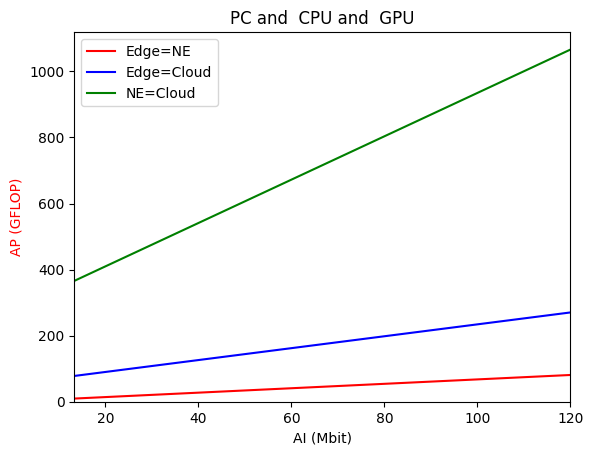

3.4084111111111108e-09 > 1.5785714285714286e-07 > 3.646794871794872e-09
[-0.5828471298037247, -0.7910068190193406, -0.9991665082349566, -1.2073261974505725, -1.4154858866661881, -1.6236455758818042, -1.8318052650974201, -2.039964954313036, -2.248124643528652]
[-24725.537720188266, -25175.092951464416, -25624.648182740566, -26074.203414016716, -26523.758645292866, -26973.313876569016, -27422.869107845167, -27872.424339121317, -28321.979570397467]
[37.63785467378712, 38.124311436557626, 38.61076819932814, 39.09722496209866, 39.583681724869166, 40.07013848763968, 40.5565952504102, 41.043052013180706, 41.52950877595122]


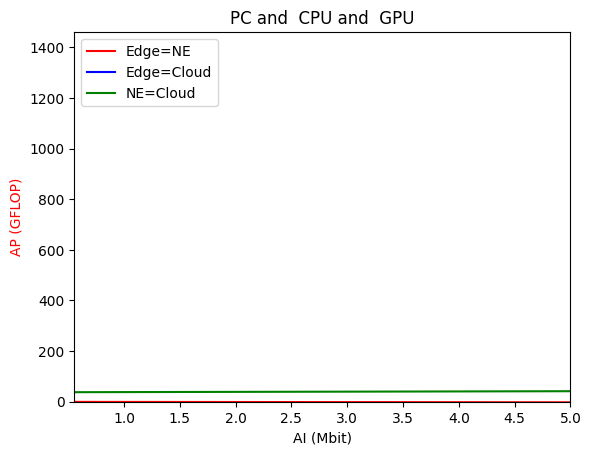

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import csv
locals().clear
globals().clear
class Infrastructure:

    def __init__(self, UtilizationEdge, UtilizationNE, EetoNE, EetoC, NEtoC, PDEtoNE, PDEtoC):
        self.EeP = EeP_Values[edge]
        self.UtilizationEdge = UtilizationEdge
        self.NEnP = ne_ct * NEnP_Values[ne]
        self.UtilizationNE = UtilizationNE
        self.CrP = c_ct * CrP_Values[cloud]
        self.EetoNE = EetoNE
        self.EetoC = EetoC
        self.NEtoC = NEtoC
        self.PDEtoNE = PDEtoNE
        self.PDEtoC = PDEtoC
        self.EeC = EeC_Values[edge]
        self.NEnC = ne_ct * NEnC_Values[ne]
        self.CrC = c_ct * CrC_Values[cloud]

    def print_configuration(self):
        print("Edge -> " + Device[edge] + " Utilization = " + str(self.UtilizationEdge) )
        print("NE -> " + NE[ne] + " Utilization = " + str(self.UtilizationNE) )
        print("Cloud -> " + Cloud[cloud]  )
        print("Bandwidth Edge to NE (Mbps) = " + str(self.EetoNE))
        print("Bandwidth Edge to Cloud (Mbps) = " + str(self.EetoC))
        print("Bandwidth NE to Cloud (Mbps) = " + str(self.NEtoC))
        print("Propagation Edge to NE (sec)= " + str(self.PDEtoNE))
        print("Propagation Edge to Cloud (sec) = " + str(self.PDEtoC))


    def compute_k(self):
        return (self.NEnP * self.UtilizationNE)/(self.EeP * self.UtilizationEdge)

    def compute_s(self):
        return self.CrP / (self.NEnP * self.UtilizationNE)

    # Functions for computing latency
    def compute_latency_Edge(self,AP):
      k = self.compute_k()
      s = self.compute_s()
      return (k*s*AP)/self.CrP

    def compute_latency_NE(self, AP, AI):
      s = self.compute_s()
      return (AI/self.EetoNE) + self.PDEtoNE + ((s*AP)/self.CrP)

    def compute_latency_Cloud(self, AP, AI):
      return (AI/self.EetoC) + self.PDEtoC + (AP/self.CrP)

    def compute_latency_NE_Cloud(self, AP, AI):
      return (AI/self.NEtoC) + self.PDEtoC - self.PDEtoNE + (AP/self.CrP)

    # Functions for computing cost
    def compute_cost_Edge(self,AP):
      return (AP/self.EeP) * (self.EeC/self.UtilizationEdge)

    def compute_cost_NE(self, AP, AI):
      transmission_cost = ((AI/self.EetoNE) + self.PDEtoNE) * NTrC
      computation_cost = (AP/self.NEnP) * (self.NEnC/self.UtilizationNE)
      return transmission_cost + computation_cost

    def compute_cost_Cloud(self, AP, AI):
      transmission_cost = ((AI/self.EetoC) + self.PDEtoC) * NTrC
      computation_cost = (AP/self.CrP) * self.CrC
      return transmission_cost + computation_cost

    def compute_cost_NE_Cloud(self, AP, AI):
      transmission_cost = ((AI/self.NEtoC) + self.PDEtoC - self.PDEtoNE) * NTrC
      computation_cost = (AP/self.CrP) * self.CrC
      return transmission_cost + computation_cost

    # Compute slope and intercept for latency equations
    def compute_latency_m1(self, k, s):
      return self.CrP/(self.EetoNE * (k-1)*s)

    def compute_latency_c1(self, k, s):
        return (self.PDEtoNE * self.CrP)/((k-1)*s)

    def compute_latency_m2(self, k, s):
      return self.CrP/(self.EetoC * ((k*s) - 1))

    def compute_latency_c2(self, k, s):
        return (self.PDEtoC * self.CrP)/((k*s) - 1)

    def compute_latency_m3(self, k, s):
        return ((self.CrP/(self.EetoC)) - (self.CrP/(self.EetoNE))) / (s - 1)

    def compute_latency_c3(self, k, s):
        return (((self.PDEtoC * self.CrP) - (self.PDEtoNE * self.CrP))/(s - 1))

    # Compute slope and intercept for cost equations
    def compute_cost_m1(self):
        denom = (self.EeC/(self.EeP * self.UtilizationEdge)) - (self.NEnC/(self.NEnP * self.UtilizationNE))
        return NTrC/(self.EetoNE * denom)

    def compute_cost_c1(self):
        denom = (self.EeC/(self.EeP * self.UtilizationEdge)) - (self.NEnC/(self.NEnP * self.UtilizationNE))
        return (self.PDEtoNE * NTrC)/denom

    def compute_cost_m2(self):
        denom = (self.EeC/(self.EeP * self.UtilizationEdge)) - (self.CrC/self.CrP)
        return NTrC/(self.EetoC * denom)

    def compute_cost_c2(self):
        denom = (self.EeC/(self.EeP * self.UtilizationEdge)) - (self.CrC/self.CrP)
        return (self.PDEtoC * NTrC)/denom

    def compute_cost_m3(self):
        denom = (self.NEnC/(self.NEnP * self.UtilizationNE)) - (self.CrC/self.CrP)
        return ((1/self.EetoC) - (1/self.EetoNE))*NTrC / denom

    def compute_cost_c3(self):
        denom = (self.NEnC/(self.NEnP * self.UtilizationNE)) - (self.CrC/self.CrP)
        return ((self.PDEtoC - self.PDEtoNE) * NTrC)/denom


    def find_satisfying_AP_latency_AP_Edge_NE(self, AI):
        k = self.compute_k()
        s = self.compute_s()
        m1 = self.compute_latency_m1(k,s)
        c1 = self.compute_latency_c1(k,s)

        # print('c1 = ' + str(c1))
        # print('m1 = ' + str(m1))
        return (m1 * AI) + c1

    def find_satisfying_AP_latency_AP_Edge_Cloud(self, AI):
        k = self.compute_k()
        s = self.compute_s()
        m2 = self.compute_latency_m2(k,s)
        c2 = self.compute_latency_c2(k,s)

        # print('c2 = ' + str(c2))
        # print('m2 = ' + str(m2))
        return (m2 * AI) + c2

    def find_satisfying_AP_latency_AP_NE_Cloud(self, AI):
        k = self.compute_k()
        s = self.compute_s()
        m3 = self.compute_latency_m3(k,s)
        c3 = self.compute_latency_c3(k,s)

        # print('c3 = ' + str(c3))
        # print('m3 = ' + str(m3))
        return (m3 * AI) + c3

    def find_satisfying_AP_cost_AP_Edge_NE(self, AI):
        k = self.compute_k()
        s = self.compute_s()
        m1 = self.compute_cost_m1()
        c1 = self.compute_cost_c1()

        # print('c1 = ' + str(c1))
        # print('m1 = ' + str(m1))
        return (m1 * AI) + c1

    def find_satisfying_AP_cost_AP_Edge_Cloud(self, AI):
        k = self.compute_k()
        s = self.compute_s()
        m2 = self.compute_cost_m2()
        c2 = self.compute_cost_c2()

        # print('c2 = ' + str(c2))
        # print('m2 = ' + str(m2))
        return (m2 * AI) + c2

    def find_satisfying_AP_cost_AP_NE_Cloud(self, AI):

        m3 = self.compute_cost_m3()
        c3 = self.compute_cost_c3()

        # print('c3 = ' + str(c3))
        # print('m3 = ' + str(m3))
        return (m3 * AI) + c3


    def identify_region(self, AP, AI):
        k = self.compute_k()
        s = self.compute_s()
        m1 = self.compute_latency_m1(k,s)
        c1 = self.compute_latency_c1(k,s)
        m2 = self.compute_latency_m2(k,s)
        c2 = self.compute_latency_c2(k,s)
        m3 = self.compute_latency_m3(k,s)
        c3 = self.compute_latency_c3(k,s)
        if m1 > m2 > m3 and c1 < c2 < c3:
          # print( "m1 > m2 > m3 and c1 < c2 < c3")
          return self.identify_region_A_D(AI, AP, m1, c1, m2, c2, m3, c3)
        elif m1 < m2 < m3 and c1 < c2 < c3:
          # print("m1 < m2 < m3 and c1 < c2 < c3")
          return self.identify_region_B_D(AI, AP, m1, c1, m2, c2, m3, c3)
        # if m1 > m2 > m3 and c1 > c2 > c3:
          # print("m1 > m2 > m3 and c1 > c2 > c3")
          # self.identify_region_A_D(AI, AP, m1, c1, m2, c2, m3, c3)
        # elif m1 < m2 < m3 and c1 > c2 > c3:
          # print("m1 < m2 < m3 c1 > c2 > c3")
          # self.identify_region_B_D(AI, AP, m1, c1, m2, c2, m3, c3)

    def identify_region_B_D(self, AI, AP, m1, c1, m2, c2, m3, c3):
      # m1 < m2 < m3 and c1 < c2 < c3
        k = self.compute_k()
        s = self.compute_s()

        AP1 = m1 * AI + c1
        AP2 = m2 * AI + c2
        AP3 = m3 * AI + c3

        if AP > max(AP1,AP2,AP3): # 1 "C < NE < E"
            # print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : C < NE < E')
            return 1
        elif AP < min(AP1,AP2,AP3): # 4 "E < NE < C"
            # print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : E < NE < C')
            return 4
        elif AP1 < AP < AP2:
            if AI > (c2 - c1) / (m1 - m2): # 3 "NE < E < C"
                # print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : NE < E < C')
                return 3
            else:
                # print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : Negative')
                return -1
        elif AP2 < AP < AP3: # 2 "NE < C < E"
            if AI > (c3 - c2) / (m2 - m3):
                # print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : NE < C < E')
                return 2
            else:
                # print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : Negative')
                return -1
        elif AP == AP1:
            return "E=NE"
        elif AP == AP2:
            return "E=C"
        elif AP == AP3:
            return "NE=C"
        elif AP1 == AP2 == AP:
            return "E=NE=C"
        elif AP2 == AP3 == AP:
            return "E=NE=C"
        elif AP3 == AP1 == AP:
            return "E=NE=C"
        else:
            return "Unknown region"

    def identify_region_A_D(self, AI, AP, m1, c1, m2, c2, m3, c3):
      # m1 > m2 > m3 and c1 < c2 < c3

        k = self.compute_k()
        s = self.compute_s()

        AP1 = m1 * AI + c1
        AP2 = m2 * AI + c2
        AP3 = m3 * AI + c3

        if AP > max(AP1,AP2,AP3): # 1 "C < NE < E"
            # print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : C < NE < E')
            return 1
        elif AP < min(AP1,AP2,AP3): # 4 "E < NE < C"
            # print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : E < NE < C')
            return 4
        elif AP1 < AP < AP2:
            if AI < (c1 - c2) / (m2 - m1): # 2 "C < E < NE"
                # print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : C < E < NE')
                return 2
            else: # 5 "NE < E < C"
                # print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : NE < E < C')
                return 5
        elif AP2 < AP < AP3: # 3 "E < C <NE"
            if AI > (c3 - c2) / (m2 - m3):
                # print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : E < C < NE')
                return 3
            else: # 6 "NE < C < E"
                # print('AI = ' + str(AI) + ' and AP = ' + str(AP) + ' : NE < C < E')
                return 6
        elif AP == AP1:
            return "E=NE"
        elif AP == AP2:
            return "E=C"
        elif AP == AP3:
            return "NE=C"
        elif AP1 == AP2 == AP:
            return "E = NE = C"
        elif AP2 == AP3 == AP:
            return "E = NE = C"
        elif AP3 == AP1 == AP:
            return "E = NE = C"
        else:
            return "Unknown region"

    def plot_latency_AP_vs_AI(self, AI_Values):

        alpha_Edge_equal_NE = []
        alpha_Edge_equal_Cloud = []
        alpha_NE_equal_Cloud = []
        AP_Edge_equal_NE = []
        AP_Edge_equal_Cloud = []
        AP_NE_equal_Cloud = []
        global latency_Edge_equal_NE
        global latency_Edge_equal_Cloud
        global latency_NE_equal_Cloud

        k = self.compute_k()
        s = self.compute_s()

        for AI in AI_Values:
            AP = self.find_satisfying_AP_latency_AP_Edge_NE(AI)
            latency_Edge_equal_NE.append(self.compute_latency_Edge(AP))
            alpha_Edge_equal_NE.append(AP/AI)
            AP_Edge_equal_NE.append(AP)

            AP = self.find_satisfying_AP_latency_AP_Edge_Cloud(AI)
            AP_Edge_equal_Cloud.append(AP)
            alpha_Edge_equal_Cloud.append(AP/AI)
            latency_Edge_equal_Cloud.append(self.compute_latency_Edge(AP))

            AP = self.find_satisfying_AP_latency_AP_NE_Cloud(AI)
            AP_NE_equal_Cloud.append(AP)
            alpha_NE_equal_Cloud.append(AP/AI)
            latency_NE_equal_Cloud.append(self.compute_latency_Cloud(AP, AI))

        # print(latency_Edge_equal_NE)
        # print(latency_Edge_equal_Cloud)
        # print(latency_NE_equal_Cloud)

        # print(AP_Edge_equal_NE)
        # print(AP_Edge_equal_Cloud)
        # print(AP_NE_equal_Cloud)

        fig, ax1 = plt.subplots()
        # ax2 = ax1.twinx()

        # ax1.plot(alpha_values_latency, k_values_latency, 'k-', label = 'k')

        # ax2.plot(alpha_values, UtilizationEdge, 'r-')

        ax1.plot(AI_Values, AP_Edge_equal_NE, 'r-', label = 'Edge=NE')
        ax1.plot(AI_Values, AP_Edge_equal_Cloud, 'b-', label = 'Edge=Cloud')
        ax1.plot(AI_Values, AP_NE_equal_Cloud, 'g-', label = 'NE=Cloud')

        # ax1.plot(AI_Values, alpha_Edge_equal_NE, 'r-', label = 'Edge=NE')
        # ax1.plot(AI_Values, alpha_Edge_equal_Cloud, 'b-', label = 'Edge=Cloud')
        # ax1.plot(AI_Values, alpha_NE_equal_Cloud, 'g-', label = 'NE=Cloud')

        ax1.set_xlabel('AI (Mbit)')
        ax1.set_ylabel('AP (GFLOP)', color='r')

        # Display legend
        lines, labels = ax1.get_legend_handles_labels()
        ax1.legend(lines, labels, loc='upper left')

        plt.xlim(left=AI_Values[0])
        plt.xlim(right=AI_Values[-1])
        plt.ylim(bottom=0)

        # plt.title(Device[edge] + ' and ' + str(ne_ct) + " " + NE[ne] + ' and ' + Cloud[cloud])
        plt.title(Device[edge] + ' and ' + NE[ne] + ' and ' + Cloud[cloud])
        # Save the first plot
        # plt.savefig(device + '_' + NE + Cloud + '_latency.png')
        plt.show()

    def plot_cost_AP_vs_AI(self, AI_Values):

        alpha_Edge_equal_NE = []
        alpha_Edge_equal_Cloud = []
        alpha_NE_equal_Cloud = []
        AP_Edge_equal_NE = []
        AP_Edge_equal_Cloud = []
        AP_NE_equal_Cloud = []
        global cost_Edge_equal_NE
        global cost_Edge_equal_Cloud
        global cost_NE_equal_Cloud

        k = self.compute_k()
        s = self.compute_s()

        for AI in AI_Values:
            AP = self.find_satisfying_AP_cost_AP_Edge_NE(AI)
            cost_Edge_equal_NE.append(self.compute_cost_Edge(AP))
            alpha_Edge_equal_NE.append(AP/AI)
            AP_Edge_equal_NE.append(AP)

            AP = self.find_satisfying_AP_cost_AP_Edge_Cloud(AI)
            AP_Edge_equal_Cloud.append(AP)
            alpha_Edge_equal_Cloud.append(AP/AI)
            cost_Edge_equal_Cloud.append(self.compute_cost_Edge(AP))

            AP = self.find_satisfying_AP_cost_AP_NE_Cloud(AI)
            AP_NE_equal_Cloud.append(AP)
            alpha_NE_equal_Cloud.append(AP/AI)
            cost_NE_equal_Cloud.append(self.compute_cost_Cloud(AP, AI))

        # print(latency_Edge_equal_NE)
        # print(latency_Edge_equal_Cloud)
        # print(latency_NE_equal_Cloud)

        print(AP_Edge_equal_NE)
        print(AP_Edge_equal_Cloud)
        print(AP_NE_equal_Cloud)

        fig, ax1 = plt.subplots()
        # ax2 = ax1.twinx()

        # ax1.plot(alpha_values_latency, k_values_latency, 'k-', label = 'k')

        # ax2.plot(alpha_values, UtilizationEdge, 'r-')

        ax1.plot(AI_Values, AP_Edge_equal_NE, 'r-', label = 'Edge=NE')
        ax1.plot(AI_Values, AP_Edge_equal_Cloud, 'b-', label = 'Edge=Cloud')
        ax1.plot(AI_Values, AP_NE_equal_Cloud, 'g-', label = 'NE=Cloud')

        # ax1.plot(AI_Values, alpha_Edge_equal_NE, 'r-', label = 'Edge=NE')
        # ax1.plot(AI_Values, alpha_Edge_equal_Cloud, 'b-', label = 'Edge=Cloud')
        # ax1.plot(AI_Values, alpha_NE_equal_Cloud, 'g-', label = 'NE=Cloud')

        ax1.set_xlabel('AI (Mbit)')
        ax1.set_ylabel('AP (GFLOP)', color='r')

        # Display legend
        lines, labels = ax1.get_legend_handles_labels()
        ax1.legend(lines, labels, loc='upper left')

        plt.xlim(left=AI_Values[0])
        plt.xlim(right=AI_Values[-1])
        plt.ylim(bottom=0)

        plt.title(Device[edge] + ' and ' + NE[ne] + ' and ' + Cloud[cloud])
        # Save the first plot
        # plt.savefig(device + '_' + NE + Cloud + '_latency.png')
        plt.show()

    def print_cost_conditions(self):

        print(str((self.EeC/(self.EeP * self.UtilizationEdge))) + ' > ' + str((self.NEnC/(self.NEnP * self.UtilizationNE))) + ' > ' + str((self.CrC/self.CrP)))
        # print(str((self.EeC/(self.EeP * self.UtilizationEdge))) + ' > ' + str((self.CrC/self.CrP)))
        # print(str((self.NEnC/(self.NEnP * self.UtilizationNE))) + ' > ' + str((self.CrC/self.CrP)))

Rpi = [24, 8, 1000, 1.840542 * 10 ** -6]
PC = [900, 128, 10000, 1.155 * 10 ** -5]
Jetson = [512, 4, 1000, 3.76533 * 10 ** -6]
CPU = [3500, 60, 10000, 0.000442]
GPU = [312000, 320, 400000, 0.0011378 ]
TPU = [191667, 192, 50000, 0.0003]

Device = ['Rpi', 'Jetson', 'PC']
NE = [' CPU', ' GPU', ' TPU']
Cloud = [' CPU', ' GPU', ' TPU']

EeP_Values = [Rpi[0], Jetson[0], PC[0] ]
EeC_Values = [PC[3], Jetson[3], Rpi[3]]
NEnP_Values = [CPU[0], GPU[0], TPU[0]]
NEnC_Values = [CPU[3], GPU[3], TPU[3]]
CrP_Values = [CPU[0], GPU[0], TPU[0]]
CrC_Values = [CPU[3], GPU[3], TPU[3]]

Utilization_Values = [0.2, 0.4, 0.6, 0.8]

EetoNE_Values = [500,1000]
PDEtoNE_Values = [0.001]
EetoC_Values = [300,600, 900]
PDEtoC_Values = [0.1]

# AI_Values =  [1, 300, 500, 800, 1000, 1200, 1500] # 6 regions
# AI_Values =  [0.1, 1, 10, 20] # 4 regions
AI_Values = np.linspace(0, 120, 10)[1:]


NTrC = 5.787 * 10 ** -5
latency_Edge_equal_NE = []
latency_Edge_equal_Cloud = []
latency_NE_equal_Cloud = []

cost_Edge_equal_NE = []
cost_Edge_equal_Cloud = []
cost_NE_equal_Cloud = []

edge = 2
ne = 0
cloud = 1
ne_ct = 1
c_ct = 2
system =  Infrastructure(Utilization_Values[2],Utilization_Values[3],EetoNE_Values[1],EetoC_Values[0],EetoC_Values[0],PDEtoNE_Values[0],PDEtoC_Values[0])
system.print_configuration()
system.plot_latency_AP_vs_AI( AI_Values)
AI_Values = np.linspace(0, 5, 10)[1:]
system.print_cost_conditions()
system.plot_cost_AP_vs_AI( AI_Values)
# system.plot_AP_vs_AI( [256*x for x in layer_AI], 2,0,2)

# AI_Values = np.linspace(400, 600, 2)
# AP_Values = np.linspace(0, 40, 5)[1:]
# for AI in AI_Values:
#   for AP in AP_Values:
#     region = system.identify_region(AP,AI)
    # print(region)

# split_algorithm(system,0,len(layer_AP)-140, 0)



# Model - ResNet50

In [3]:
from keras.api._v2.keras.layers import Activation
import tensorflow as tf
import numpy as np


class Model:

    def __init__(self,model):
      self.model = model
      self.layer_AI = []
      self.layer_AP = []

    def store_AP_AI(self,layer_AP,layer_AI):
      self.layer_AI = layer_AI
      self.layer_AP = layer_AP

    # model_input_shape = (batch_size, 224, 224, 3)

    # Define a function to compute the number of operations for a Conv2D layer
    def compute_ops_conv2d(self,layer):
        kernel_size = layer.kernel_size[0]
        in_channels = layer.input_shape[-1]
        out_channels = layer.output_shape[-1]
        input_height, input_width = layer.input_shape[1:3]
        output_height, output_width = layer.output_shape[1:3]
        ops = kernel_size**2 * in_channels * output_height * output_width * out_channels
        return ops

    # Define a function to compute the number of operations for a MaxPooling2D layer
    def compute_ops_maxpool2d(self,layer):
        pool_size = layer.pool_size[0]
        in_channels = layer.input_shape[-1]
        input_height, input_width = layer.input_shape[1:3]
        output_height, output_width = layer.output_shape[1:3]
        ops = pool_size**2 * in_channels * output_height * output_width
        return ops

    # Define a function to compute the number of operations for a BatchNormalization layer
    def compute_ops_batchnorm(self,layer):
        # Get input shape
        input_shape = layer.input_shape[1:]
        in_channels = input_shape[-1]

        # Number of operations per element (2 for mean and variance)
        ops = 2 * in_channels

        return ops

    # Define a function to compute the number of operations for a ReLU layer
    def compute_ops_relu(self,layer):

        input_shape = layer.input_shape[1:]
        # Number of operations per element
        ops = 1
        for dim in input_shape:
            ops *= dim

        return ops

    # Define a function to compute the number of operations for the output layer
    def compute_ops_output(self,layer):
        num_input_channels = layer.input_shape[-1]
        num_output_channels = layer.output_shape[-1]
        fc_ops = (num_input_channels * num_output_channels) + num_output_channels
        if type(layer.activation) == tf.keras.activations.softmax or type(layer.activation) == tf.keras.activations.sigmoid:
            num_elements = tf.reduce_prod(layer.output_shape[1:])
            act_ops = num_elements
        else:
            act_ops = 0
        ops = fc_ops + act_ops
        return ops

    # Define a function to compute the number of operations for a padding layer
    def compute_ops_pad(self,layer):
        in_channels = layer.input_shape[-1]
        input_height, input_width = layer.input_shape[1:3]
        # Get the padding parameter from the layer's configuration
        padding = layer.get_config()['padding']

        top_padding = padding[0][0]
        bottom_padding = padding[0][1]
        left_padding = padding[1][0]
        right_padding = padding[1][1]
        total_padding = top_padding + bottom_padding + left_padding + right_padding
        ops = 2 * in_channels * input_height * input_width * total_padding
        return ops

    # Define a function to compute the number of operations for a padding layer
    def compute_ops_add(self,layer):
        in_channels = layer.input_shape[0][-1]
        input_height, input_width = layer.input_shape[0][1:3]
        ops = 2 * in_channels * input_height * input_width
        return ops
    # Print the number of operations for each layer in the model


    def compute_model(self):
        i = 0
        # Define a dictionary to store the number of operations for each layer
        ops_dict = {}
        # Compute the number of operations for each layer in the model
        for layer in self.model.layers:
            if isinstance(layer, tf.keras.layers.Conv2D):
                ops = self.compute_ops_conv2d(layer)
            elif isinstance(layer, tf.keras.layers.MaxPooling2D):
                ops = self.compute_ops_maxpool2d(layer)
            elif isinstance(layer, tf.keras.layers.BatchNormalization):
                ops = self.compute_ops_batchnorm(layer)
            elif isinstance(layer, tf.keras.layers.Activation):
                ops = self.compute_ops_relu(layer)
            elif isinstance(layer, tf.keras.layers.Dense):
                ops = self.compute_ops_output(layer)
            elif "pad" in layer.name:
                ops = self.compute_ops_pad(layer)
            elif "add" in layer.name:
                ops = self.compute_ops_add(layer)
            else:
                ops = 0
            ops_dict[layer.name] = [ops, layer.input_shape, layer.output_shape]
            # print(layer.get_config())

        ct = 1

        for layer_name, (ops, inp, out) in ops_dict.items():
            inp_size = 0

            if inp[0] is not None:
              (n,l,h,w) = inp[0]
              inp_size += l*h*w/1000000

              if len(inp) == 2:
                (n,l,h,w) = inp[1]
                inp_size += l*h*w/1000000

            elif len(inp) > 2:
              inp_size += inp[1]*inp[2] * inp[3]/1000000
            else:
              inp_size += inp[1]/1000000

            if i == 0:
              (n,l,h,w) = inp[0]
              i = i+10
              params = l*h*w
            # print(layer_name, ops, inp_size)
            if ops != 0:
              # print(layer_name, ops, layer.input_shape)
              self.layer_AP.append(ops/1000000000)
              self.layer_AI.append(inp_size*8)
            # else:
            #   print(layer_name, ops, layer.input_shape)
            #   print(ct)
            # ct = ct + 1


# Instantiate the ResNet50 model
model =  tf.keras.applications.resnet.ResNet50(weights=None)
ResNet50 = Model(model)
ResNet50.compute_model()
# print(len(ResNet50.layer_AP))


Batch_Size = 1

layer_AP = [Batch_Size * x for x in ResNet50.layer_AP]
layer_AI = [Batch_Size * x for x in ResNet50.layer_AI]
ResNet50.store_AP_AI(layer_AP,layer_AI)

model = tf.keras.applications.vgg16.VGG16(weights=None)
VGG16 = Model(model)
VGG16.compute_model()

model =  tf.keras.applications.resnet.ResNet152(weights='imagenet')
ResNet152 = Model(model)
ResNet152.compute_model()

model =  tf.keras.applications.InceptionResNetV2(weights=None)
InceptionResNetV2 = Model(model)
InceptionResNetV2.compute_model()



242900224/242900224 [==============================] - 1s 0us/step


In [27]:
model =  tf.keras.applications.resnet.ResNet50(weights=None)
print(len(model.layers))

177


# Split algorithm

In [18]:
class minimum_Latency:
    def __init__(self,edge,NE,latency):
        self.edge = edge
        self.NE = NE
        self.latency = latency

def compute_sum(start,end):
        return sum(layer_AP[start:end])

def split_algorithm(start, end):

    global latency_Edge
    global latency_Cloud
    global latency_NE
    global layer_values

    global AP_1
    global AP_2
    AP = compute_sum(start,end)

    for layer in range(start,end):
        layer_values.append(layer)
        AI_l = layer_AI[layer]
        AP_Edge = compute_sum(layer,end)
        AP_1.append(AP-AP_Edge)
        AP_2.append(AP_Edge)
        latency_Edge.append(system.compute_latency_Edge(AP-AP_Edge))
        latency_NE.append(system.compute_latency_NE(AP_Edge,AI_l))
        latency_Cloud.append(system.compute_latency_Cloud(AP_Edge, AI_l))

    # print(latency_Edge[::-1])
    print(latency_Edge)
    print(latency_NE)
    print(latency_Cloud)

    # index = latency_NE.index(min(latency_NE))
    # print(index)
    # print(min(latency_NE))
    # print(latency_Edge[index-1])
    # print(layer_values)
    global optimal
    optimal = minimum_Latency(end,0,system.compute_latency_Edge(AP))
    if latency_NE[0] < optimal.latency:
        optimal = minimum_Latency(-1,len(layer_AI),latency_NE[0])
        # print(optimal.compute_latency())
    if latency_Cloud[0] < optimal.latency:
        optimal = minimum_Latency(-1,-1,latency_Cloud[0])
        # print(optimal.compute_latency())
    for ind in layer_values[0:len(layer_values)]:
        lat1 = latency_Edge[ind] + latency_NE[ind]
        lat2 = latency_Edge[ind] + latency_Cloud[ind]
        # print(lat1)
        # print(lat2)
        if lat1 < lat2:
            if lat1 < optimal.latency:
                optimal = minimum_Latency(ind,len(layer_AI),lat1)
                print("lat1")
        elif lat2 < lat1:
            if lat2 < optimal.latency:
                # optimal = minimum_Latency(ind,ind,lat2)
                print("lat2")
                latency_NE_back = []
                latency_NE_Cloud = []
                AP_E =[]
                AP_NE = []
                AP_C = []

                for back in range(1,ind):
                    AI_l = layer_AI[back]
                    # AP_l = compute_sum(back,ind)
                    AP_E.append(AP_1[back])
                    AP_NE.append(AP_1[ind]-AP_1[back])
                    AP_C.append(AP_2[ind])
                    latency_NE_Cloud.append(system.compute_latency_NE_Cloud(AP_2[ind],layer_AI[ind]))
                    latency_NE_back.append(system.compute_latency_NE(AP_1[ind]-AP_1[back],AI_l))
                    value = latency_Edge[back] + system.compute_latency_NE(AP_1[ind]-AP_1[back],AI_l) + system.compute_latency_NE_Cloud(AP_2[ind],layer_AI[ind])
                    # print(value)
                    if value < optimal.latency:
                        optimal = minimum_Latency(back,ind,value)
                        print("here")
            # sum_AP = [(x + y + z) for x,y,z in zip(AP_E,AP_NE,AP_C)]
            # print(sum_AP)

# layer_AI = input
# layer_AI[0] = Batch_Size * layer_AI[0]
latency_Edge = []
latency_Cloud = []
latency_NE = []
layer_values = []
AP_1 = []
AP_2 = []

Batch_Size1 = 64
Batch_Size2 = 16
Batch_Size3 = 8

# layer_AP =   [Batch_Size1 * x for x in ResNet152.layer_AP] + [Batch_Size1 * x for x in ResNet50.layer_AP] + [Batch_Size2 * x for x in InceptionResNetV2.layer_AP] + [Batch_Size3 * x for x in ResNet152.layer_AP]
# layer_AI =   [Batch_Size1 * x for x in ResNet152.layer_AI] + [Batch_Size1 * x for x in ResNet50.layer_AI] + [Batch_Size2 * x for x in InceptionResNetV2.layer_AI] + [Batch_Size3 * x for x in ResNet152.layer_AI]

# layer_AP = ResNet50.layer_AP
# layer_AI = ResNet50.layer_AI

# layer_AP = InceptionResNetV2.layer_AP
# layer_AI = InceptionResNetV2.layer_AI

# layer_AP =  [Batch_Size1 * x for x in ResNet50.layer_AP]
# layer_AI =  [Batch_Size1 * x for x in ResNet50.layer_AI]

# layer_AP =  [Batch_Size1 * x for x in ResNet152.layer_AP]
# layer_AI =  [Batch_Size1 * x for x in ResNet152.layer_AI]

layer_AP =  [Batch_Size1 * x for x in InceptionResNetV2.layer_AP]
layer_AI =  [Batch_Size1 * x for x in InceptionResNetV2.layer_AI]

# system.EetoNE = 322  # ResNet50
system.EetoNE = 500
system.NEtoC = 300
# print(optimal.compute_latency())
split_algorithm(0,len(layer_AI))
print("edge = " + str(optimal.edge) + " : NE = " + str(optimal.NE))
print(optimal.latency)
print(len(layer_AP))

[0.0, 0.0022733823999997356, 0.0022733899851851273, 0.0023575893333330628, 0.025960379733333046, 0.025960387318518435, 0.026042341451851473, 0.07324792225185185, 0.07324793742222223, 0.07341184568888871, 0.07377563875555569, 0.0770093549037037, 0.07700937386666654, 0.07705990068148165, 0.1596516446814816, 0.15965169019259268, 0.15976640094814828, 0.16001728094814824, 0.16180131650370372, 0.1618013316740741, 0.16181062352592587, 0.1631486501925927, 0.1711768101925924, 0.17117682157037029, 0.17117684432592606, 0.17118381321481466, 0.1711977509925928, 0.17387380432592603, 0.18502402654814806, 0.1970662665481482, 0.1988503021037037, 0.19885032485925905, 0.1988503400296294, 0.19885036278518514, 0.19885037795555552, 0.1988643157333332, 0.19887360758518502, 0.19888754536296271, 0.19889683721481452, 0.20038353351111104, 0.20038354109629603, 0.20038818702222191, 0.20187488331851844, 0.20388192331851887, 0.20388193090370427, 0.20388194228148215, 0.20388658820740804, 0.2038935570962967, 0.2053802

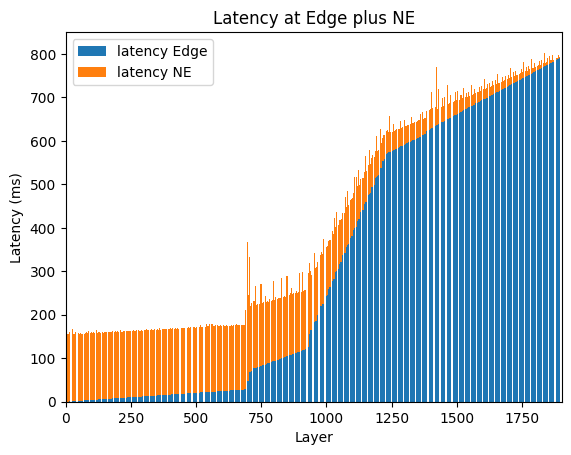

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data

x = np.arange(len(latency_Edge))  # x-axis values
y1 = np.multiply(latency_Edge, 1000)
y2 = np.multiply(latency_NE, 1000)
# Plotting the stacked bar graph
plt.bar(x, y1, label='latency Edge')
plt.bar(x, y2, bottom=y1, label='latency NE')

# Axis labels and title
plt.xlabel('Layer')
plt.ylabel('Latency (ms)')
plt.title('Latency at Edge plus NE')
plt.xlim(left=0)
plt.xlim(right=len(x)+1)
plt.ylim(bottom=0)
# Legend
plt.legend()

# Display the plot
plt.show()


In [55]:
sum_latency = [(x + y) for x,y in zip(latency_Edge,latency_NE)]
print(sum_latency)
min_index = np.argmin(sum_latency)
min_value = sum_latency[min_index]
print(min_index)
print(min_value)

sum_latency = [(x + y) for x,y in zip(latency_Edge,latency_Cloud)]
print(sum_latency)
min_index = np.argmin(sum_latency)
min_value = sum_latency[min_index]
print(min_index)
print(min_value)

[0.15490411525142905, 0.15497489114476237, 0.16030421566031794, 0.1603042158516407, 0.16030541582793695, 0.16054643963830736, 0.15550081958497397, 0.15552001920571473, 0.1555200193970375, 0.15552031939111158, 0.1556931159777782, 0.15569311616910098, 0.15569341616317506, 0.15577021464613805, 0.1606639091291011, 0.16066390989439208, 0.16708643865968315, 0.16066631061227576, 0.160667510588572, 0.155927413071535, 0.15592741326285775, 0.15592771325693178, 0.1561005098435985, 0.15610051003492126, 0.1561008100289953, 0.16099450451195824, 0.1674170332772493, 0.1609969052298418, 0.16099810520613816, 0.15625800768910114, 0.1562580078804239, 0.1562583078744979, 0.15643110446116462, 0.1564311046524874, 0.1564314046465614, 0.16132509912952436, 0.16774762789481534, 0.16132749984740796, 0.1613286998237043, 0.15574738706518582, 0.15574738744783126, 0.1557475374448683, 0.15592033403153502, 0.15592033441418046, 0.1615401964112175, 0.1560740813771435, 0.15855932786010635, 0.15855932939068831, 0.161770594

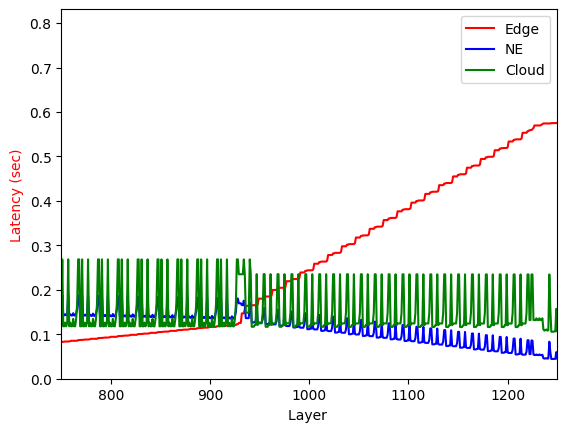

In [77]:
def plot_AP_vs_Latency(system, start, end):


        # print(latency_Edge[::-1])
        # print(latency_NE)
        # print(latency_Cloud)
        # print(layer_values)

        fig, ax1 = plt.subplots()
        # ax2 = ax1.twinx()

        # ax1.plot(alpha_values_latency, k_values_latency, 'k-', label = 'k')

        # ax2.plot(alpha_values, UtilizationEdge, 'r-')

        ax1.plot(layer_values, latency_Edge, 'r-', label = 'Edge')
        ax1.plot(layer_values, latency_NE, 'b-', label = 'NE')
        ax1.plot(layer_values, latency_Cloud, 'g-', label = 'Cloud')

        # ratio = [x/y for x,y in zip(layer_AP,layer_AI)]
        # # ax1.plot(layer_values, layer_AP/layer_AI, 'b-', label = 'AI')
        # ax1.plot(layer_values, ratio, 'r-', label = 'alpha')

        ax1.set_xlabel('Layer ')
        ax1.set_ylabel('Latency (sec)', color='r')

        # Display legend
        lines, labels = ax1.get_legend_handles_labels()
        ax1.legend(lines, labels, loc='upper right')

        plt.xlim(left=750)
        plt.xlim(right=1250)
        plt.ylim(bottom=0)

        # plt.title(Device[device] + ' and ' + NE[ne] + ' and ' + Cloud[cloud])
        # Save the first plot
        # plt.savefig(device + '_' + NE + Cloud + '_latency.png')
        plt.show()

# Example where all layers lies in
# Batch_Size = 1

# layer_AP = [Batch_Size * x for x in ResNet50.layer_AP]
# layer_AI = [Batch_Size * x for x in ResNet50.layer_AI]
# plot_AP_vs_Latency(system, 0,len(layer_AP)-1)
# print(len(layer_AP))
# Batch_Size = 8

# layer_AP = [Batch_Size * x for x in ResNet50.layer_AP]
# layer_AI = [Batch_Size * x for x in ResNet50.layer_AI]
# plot_AP_vs_Latency(system, 0,len(layer_AP)-1)

# Batch_Size = 16

# layer_AP = [Batch_Size * x for x in ResNet50.layer_AP]
# layer_AI = [Batch_Size * x for x in ResNet50.layer_AI]
plot_AP_vs_Latency(system,0,len(layer_AP)-1)

In [ ]:
print(latency_Edge[1])
print(latency_NE[0])
print(latency_Cloud[0])

0.02458623999999983
0.0036513555571428564
0.10424440037038463


# Extra code

In [ ]:
def split_algorithm(system,start,end,prev):
    if start > end:
        return 0
    AP = compute_sum(start,end)
    AI = layer_AI[start]
    print(" AP = " + str(AP) + "and AI = " + str(AI))
    if prev == 2:
        return system.compute_latency_Cloud(AP,AI)
    elif prev == 1:
        region = system.identify_region(AP,AI)
        print("1 region = " + str(region))
        if region == 4 or region == 5 or region == 6:
            return system.compute_latency_NE(AP,AI)
        else:
          AP_max = system.find_satisfying_AP_latency_AP_NE_Cloud(AI)
          min_val = 100000
          for layer in range(start,end):
              AP_l = compute_sum(start,layer)
              if  AP_l < AP_max:
                  min_val = min(min_val, split_algorithm(system,start,layer,1) + split_algorithm(system,layer+1,end,2))
          return min_val
    elif prev == 0:
        region = system.identify_region(AP,AI)
        print("0 region = " + str(region))
        if region == 3 or region == 4:
            return system.compute_latency_Edge(AP)
        elif region == 5 or region == 6:
            AP_max = system.find_satisfying_AP_latency_AP_Edge_NE(AI)
            print(" AP_max = " + str(AP_max))
            min_val = 100000
            for layer in range(start+1,end-1):
                AP_l = compute_sum(start,layer)
                if  AP_l < AP_max:
                    min_val = min(min_val, split_algorithm(system,start,layer,0) + split_algorithm(system,layer+1,end,1))
            return min_val
        else:
            AP_max = system.find_satisfying_AP_latency_AP_Edge_Cloud(AI)
            print(" AP_max = " + str(AP_max))
            min_val = 100000
            for layer in range(start,end-1):
                AP_l = compute_sum(start,layer)
                print(AP_l)
                # return
                if  AP_l < AP_max:
                    min_val = min( min_val, split_algorithm(system,start,layer,0) + split_algorithm(system,layer+1,end,1))
            return min_val





def plot_k_vs_alpha_combined(EeP_Values, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE,EeC_Values,NEnC,NTrC):
    data = []
    for i in range(len(EeP_Values)):
        EeP = EeP_Values[i]
        EeC = EeC_Values[i]

        # alpha_max = calculate_alpha_max_latency(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE)
        # # print(alpha_max)
        alpha_max = calculate_alpha_max_cost(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE,EeC,NEnC,NTrC)
        # print(alpha_max)
        A_p_max = A_I * alpha_max
        alpha_values = []
        km_values = []
        # m_values = []
        cost_edge_plus = []
        cost_edge_minus = []
        cost_NE_plus = []
        cost_NE_minus = []
        cost_NE = []
        cost_edge = []
        UtilizationEdge_cost = []
        UtilizationEdge_latency = []
        A_P = np.linspace(0, A_p_max, 11)[1:]
        for A_p in A_P:
            km = find_satisfying_km_cost(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE, A_p,EeC,NEnC,NTrC)
            alpha_values.append(A_p / A_I)
            km_values.append(km)
            cost_NE.append(compute_cost_NE(EetoNE, PDEtoNE, A_I, NEnP, UtilizationNE, A_p,NEnC,NTrC))
            cost_edge.append(compute_cost_Edge( NEnP, UtilizationNE, A_p, NEnC, km ))
            cost_edge_plus.append(compute_cost_Edge( NEnP, UtilizationNE, A_p, NEnC, km + 0.1 ))
            cost_edge_minus.append(compute_cost_Edge( NEnP, UtilizationNE, A_p, NEnC, km - 0.1 ))

            UtilizationEdge_cost.append(compute_UtilizationEdge_cost(EeP, NEnP, UtilizationNE,EeC,NEnC,km))

        alpha_max_latency = calculate_alpha_max_latency(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE)
        A_p_max_latency = A_I * alpha_max_latency
        alpha_values_latency = []
        k_values_latency = []
        latency_edge_plus = []
        latency_edge_minus = []
        latency_NE = []
        UtilizationEdge_latency = []
        A_P = np.linspace(0, A_p_max_latency, 11)[1:]
        for A_p in A_P:
            k = find_satisfying_k(EeP, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE, A_p)
            alpha_values_latency.append(A_p / A_I)
            k_values_latency.append(k)
            latency_NE.append(compute_latency_NE(EetoNE, PDEtoNE, A_I, NEnP, UtilizationNE, A_p))
            latency_edge_plus.append(compute_latency_Edge(NEnP, UtilizationNE, A_p,k+1))
            latency_edge_minus.append(compute_latency_Edge(NEnP, UtilizationNE, A_p,k-2))
            UtilizationEdge_latency.append(compute_UtilizationEdge_latency(EeP, NEnP, UtilizationNE,k+1))

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()

        ax1.plot(alpha_values, km_values, 'k-', label = 'k_Cost')
        ax1.plot(alpha_values_latency, k_values_latency, 'b-', label = 'k_latency')

        ax2.plot(alpha_values, UtilizationEdge_cost, 'r-', label = 'Cost Utilization')
        ax2.plot(alpha_values, UtilizationEdge_latency, 'g-', label = 'latency Utilization')
        # ax2.plot(alpha_values, cost_edge, 'r-', label = 'Edge/NE:k')
        # ax2.plot(alpha_values, cost_edge_plus, 'b-', label = 'Edge:k+1')
        # ax2.plot(alpha_values, cost_edge_minus, 'g-', label = 'Edge:k-1')

        ax1.set_xlabel('alpha')
        ax1.set_ylabel('Multiplexing factor k', color='b')
        ax2.set_ylabel('Utilization Edge', color='r')
        # ax2.set_ylabel('latency_NE', color='g')

        # Display legend
        lines, labels = ax1.get_legend_handles_labels()
        ax1.legend(lines, labels, loc='lower left')
        lines, labels = ax2.get_legend_handles_labels()
        ax2.legend(lines, labels, loc='upper left')
        plt.title('k vs alpha')
        plt.show()

plot_k_vs_alpha_combined(EeP_Values, NEnP, EetoNE, PDEtoNE, A_I, UtilizationNE,EeC_Values,NEnC,NTrC)